In [1]:
from models import *
from utils import *
from model_utils import *

d:\xPlain\streamlit_app\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('filtered_leads.csv')

In [3]:
df.columns

Index(['FullName', 'Lead_ID', 'Lead_Name', 'Date_x', 'Campaign_Name',
       'Mobile Number', 'Age Range', 'Gender Name', 'Nationality Name',
       'Service Count', 'Total Revenue_y', 'Offer Name', 'Date_y',
       'Specialty Name', 'Diagnosis Name', 'res_mapping_binary', 'lead_count',
       'is_achieved', 'Date'],
      dtype='object')

In [4]:
df.drop(['FullName', 'Lead_ID', 'Date_x', 'Mobile Number', 'Date_y', 'Date'], inplace= True, axis= 1)

In [5]:
target= 'res_mapping_binary'

In [6]:
def handle(_df, trg, cls= 'Classification'):
    X= _df.drop([trg], axis= 1)
    y= _df[trg]

    if cls == 'Classification':
        X_train, X_test, y_train, y_test= train_test_split(X, y, stratify= y, test_size= 0.1)
    else:
        X_train, X_test, y_train, y_test= train_test_split(X, y, shuffle= False, test_size= 0.1)

    return X_train, X_test, y_train, y_test

In [7]:
def process_data(_df, all= False):
    DF= missing(_df, 'Impute Missing Data')
    DF= remove_outliers(DF, 'Use Isolation Forest')
    if all:
        return DF

    X_train, X_test, y_train, y_test= handle(DF, target, 'Regression')
    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test= process_data(df)

In [9]:
cfg= {'alg': 'XGB_cls', 'apply_GridSearch': False, 'skew_fix': False, 'poly_feat': False, 'save': False, 'task_type': 'Classification'}

In [10]:
_model= Model(cfg['alg'], cfg['apply_GridSearch'])

In [11]:
_model.train(X_train, y_train, cfg['skew_fix'], cfg['poly_feat'])

In [12]:
_model.pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Lead_Name', 'Campaign_Name',
                                                   'Age Range', 'Gender Name',
                                                   'Nationality Name',
                                                   'Offer Name',
                                                   'Specialty Name',
                                                   'Diagnosis Name']),
                                                 ('numerical',
                                                  Pipeline(ste...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [13]:
_model.cls_metrics(X_test, y_test)

(array([[1152,  355],
        [ 518,  221]]),
 0.6113089937666963)

In [14]:
_model.__dict__

{'pipeline': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('categorical',
                                                   Pipeline(steps=[('cat_imp',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('one_hot_encoder',
                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                   ['Lead_Name', 'Campaign_Name',
                                                    'Age Range', 'Gender Name',
                                                    'Nationality Name',
                                                    'Offer Name',
                                                    'Specialty Name',
                                                    'Diagnosis Name']),
                                                  ('numeric

In [15]:
X_train

,Lead_Name,Campaign_Name,Age Range,Gender Name,Nationality Name,Service Count,Total Revenue_y,Offer Name,Specialty Name,Diagnosis Name,lead_count,is_achieved
0,samah mohamed omar salam,ALW_Cross Referral_Daily Review,Adults (25-40 years),Female,Saudi Arabia,1.0,3780.0,PKG Six sessions venus legacy,NUTRITION,Obesity,1.0,False
1,Nevein ElSayed ElGawad Soliman,ALW_OBE_Rework_Internal Segmentation,Adults (25-40 years),Female,Syria,2.0,10351380.0,PKG 1 ml skinfill filler,Dermatology,NotSpecified,1.0,False
2,Nevein ElSayed ElGawad Soliman,ALW_OBE_Rework_Internal Segmentation,Adults (25-40 years),Female,Syria,2.0,10351380.0,PKG 1 ml tosyal or juvederm,Dermatology,NotSpecified,1.0,False
3,doaa mohamed ali alatas,ALW_leakage_Internal Segmentation,Adults (25-40 years),Female,Saudi Arabia,1.0,1400.0,4 sesssions laser gentle full body,cosmatology,NotSpecified,1.0,False
5,Sara Mansour alenzey alenzey,ALW_Derma_Leakage_Internal Segmentation,Adults (25-40 years),Female,Saudi Arabia,2.0,1300899.0,PKG Botox Full Face-dysport,Dermatology,NotSpecified,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
26463,nogod swelh Awad ALJEHNI,ALW_Dermatology_Promotors_Internal Segmentation,Adults (25-40 years),Female,Saudi Arabia,1.0,899.0,PKG botox for face,Dermatology,NotSpecified,1.0,False
26464,Ebtehal abd elkader Saleh hlwani,ALW_Dermatology_Promotors_Internal Segmentation,Adults (41-64 years),Female,Saudi Arabia,1.0,1680.0,Morpheus face & neck with cream,Dermatology,NotSpecified,1.0,False
26465,Ebtehal abd elkader Saleh hlwani,ALW_Dermatology_Promotors_Internal Segmentation,Adults (41-64 years),Female,Saudi Arabia,1.0,1899.0,PkG Ultraformer face and neck,Dermatology,NotSpecified,1.0,False
26466,Ebtehal abd elkader Saleh hlwani,ALW_Dermatology_Promotors_Internal Segmentation,Adults (41-64 years),Female,Saudi Arabia,2.0,450.0,Madera therapy massage 1+1 free,Physiotherapy,NotSpecified,1.0,False


In [16]:
X_test

,Lead_Name,Campaign_Name,Age Range,Gender Name,Nationality Name,Service Count,Total Revenue_y,Offer Name,Specialty Name,Diagnosis Name,lead_count,is_achieved
26468,Dalal mohamed,ALW_Dermatology_Promotors_Internal Segmentation,Adults (25-40 years),Female,Saudi Arabia,2.0,15931093.0,ND-2ml filler,Dermatology,NotSpecified,1.0,False
26469,Dalal mohamed,ALW_Dermatology_Promotors_Internal Segmentation,Adults (41-64 years),Female,Saudi Arabia,2.0,0.0,ND23-Botox Full face,Dermatology,NotSpecified,1.0,False
26470,Dalal mohamed,ALW_Dermatology_Promotors_Internal Segmentation,Adults (41-64 years),Female,Saudi Arabia,2.0,0.0,ND23-Hydrafacial session + one session mesothe...,Dermatology,NotSpecified,1.0,False
26471,Dalal mohamed,ALW_Dermatology_Promotors_Internal Segmentation,Adults (41-64 years),Female,Saudi Arabia,2.0,11991199.0,PKG Ultraformer for face,Dermatology,Changes in skin texture,1.0,False
26472,Dalal mohamed,ALW_Dermatology_Promotors_Internal Segmentation,Adults (41-64 years),Female,Saudi Arabia,2.0,11991199.0,PKG Ultraformer for face,cosmatology,NotSpecified,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
29380,Hanaa Abdullah abed Fahd,ALW_Nutrition>35 BMI_DailyReview,Adults (41-64 years),Female,Saudi Arabia,2.0,2502893.0,ND23-two sessions IV Drip + SoCheck Test,NUTRITION,NotSpecified,1.0,False
29381,samera Saeed alzhrani,ALW_Nutrition>35 BMI_DailyReview,Adults (25-40 years),Female,Saudi Arabia,1.0,1045.0,PKG 3 month diet + socheck,NUTRITION,NotSpecified,1.0,False
29382,shahd Khaled Hafez,ALW_Dedicated Offer Campaign_Internal Segmenta...,Adults (25-40 years),Female,Saudi Arabia,2.0,0.0,ND23-Anber Rejuvenation 3 ml,Dermatology,NotSpecified,1.0,False
29383,halla Helal Abdullah ALMALKI,G_ALW_Medical_Concierge_cosmatology_DailyReview,Adults (25-40 years),Female,Saudi Arabia,1.0,1139.0,Morpheus for face with cream with mesotherapy,"Dermatology, Cosmatology",NotSpecified,1.0,False


In [17]:
_model.pipeline.__dict__['steps'][1]

('model',
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...))

In [18]:
print(_model.pipeline.named_steps['preprocessor'].named_transformers_['categorical'])

Pipeline(steps=[('cat_imp', SimpleImputer(strategy='most_frequent')),
                ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))])


In [19]:
cats= _model.pipeline.named_steps['preprocessor'].named_transformers_['categorical'].get_feature_names_out().tolist()

In [20]:
_model.pipeline.named_steps['preprocessor'].named_transformers_['numerical'].get_feature_names_out()

array(['Service Count', 'Total Revenue_y', 'lead_count'], dtype=object)

In [21]:
nums= _model.pipeline.named_steps['preprocessor'].named_transformers_['numerical'].get_feature_names_out().tolist()

In [22]:
all= cats + nums

In [23]:
len(all)

3656

In [24]:
tra= _model.pipeline.named_steps['preprocessor'].transform(X_test)

In [25]:
tra.shape

(2246, 3656)

In [26]:
tra= tra.toarray()

In [27]:
transformed_df = pd.DataFrame(tra, columns=all)

In [28]:
transformed_df

,Lead_Name_ Enaam Abdullah Elharbi Elharbi,Lead_Name_ || 2023-04-12 00:00:00.0,Lead_Name_ABDULLAH SALEM HINDI AL HARBE,Lead_Name_ABDULLAH ZAFER AL SEBE'E,Lead_Name_ABDULRAHMAN HASSAN HAMID ALBREIDI,Lead_Name_AHMED SALEH SAAD AL RHEF,Lead_Name_AISHA MOHAMMED ALZUBERY ALZUBERY,Lead_Name_ALGWHRA Ali Saad sahloly,Lead_Name_ALGWHRA Atiaat Mousa alblwi,Lead_Name_AMJAD FATHY Hussein HUDEIRY,...,Diagnosis Name_Pure hypercholesterolemia,Diagnosis Name_Pyogenic arthritis,"Diagnosis Name_Refractory anemia, unspecified","Diagnosis Name_SPONDYLOLYSIS, CERVICAL REGION",Diagnosis Name_Telogen effluvium,Diagnosis Name_Type 2 diabetes mellitus without complications,Diagnosis Name_Vitamin D deficiency,Service Count,Total Revenue_y,lead_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.062703e-07,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.000000e+00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.000000e+00,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,7.998879e-08,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,7.998879e-08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.669586e-08,0.0
2242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.970803e-12,0.0
2243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.000000e+00,0.0
2244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.597841e-12,0.0


In [29]:
from interpretability import shap_lime

In [30]:
p= shap_lime(cfg, X_train, X_test, y_train, y_test, _model, plot_contribution= {"idx": 200, 'agg': False})

ticks Nora Abdullah abd elrahman Elghanem = Lead_Name
ticks Dermatology = Specialty Name
ticks NotSpecified = Diagnosis Name
ticks ALW_BEAUTY_Assesment_Internal Segmentation = Campaign_Name
ticks ND23-Botox Full face = Offer Name
ticks Saudi Arabia = Nationality Name
ticks Adults (25-40 years) = Age Range
ticks Female = Gender Name
ticks False = is_achieved


In [31]:
list(p[0][0])

['Nora Abdullah abd elrahman Elghanem',
 'ALW_BEAUTY_Assesment_Internal Segmentation',
 'Adults (25-40 years)',
 'Female',
 'Saudi Arabia',
 np.float64(3.0),
 np.float64(3503524499.0),
 'PKG gold peeling',
 'Dermatology',
 'NotSpecified',
 np.float64(1.0),
 np.False_]

In [32]:
p[0][1]

['Lead_Name',
 'Campaign_Name',
 'Age Range',
 'Gender Name',
 'Nationality Name',
 'Service Count',
 'Total Revenue_y',
 'Offer Name',
 'Specialty Name',
 'Diagnosis Name',
 'lead_count',
 'is_achieved']

In [37]:
t= [list(p[0][0]), p[0][1]]

In [39]:
t[0]

['Salma Mohamed Ahmed',
 'ALW_Botox _Internal Segmentation',
 'Adults (41-64 years)',
 'Female',
 'Saudi Arabia',
 np.float64(1.0),
 np.float64(399.0),
 'PKG one session laser Hair removal full body Gentle + Retouch',
 'Assessment',
 'NotSpecified',
 np.float64(1.0),
 np.False_]

In [36]:
p[0][0].columns

Index(['Lead_Name_shape_values_class_0', 'Campaign_Name_shape_values_class_0',
       'Age Range_shape_values_class_0', 'Gender Name_shape_values_class_0',
       'Nationality Name_shape_values_class_0',
       'Service Count_shape_values_class_0',
       'Total Revenue_y_shape_values_class_0',
       'Offer Name_shape_values_class_0',
       'Specialty Name_shape_values_class_0',
       'Diagnosis Name_shape_values_class_0',
       'lead_count_shape_values_class_0', 'is_achieved_shape_values_class_0'],
      dtype='object')

In [35]:
p[0][1].columns

Index(['Lead_Name', 'Campaign_Name', 'Age Range', 'Gender Name',
       'Nationality Name', 'Service Count', 'Total Revenue_y', 'Offer Name',
       'Specialty Name', 'Diagnosis Name', 'lead_count', 'is_achieved'],
      dtype='object')

In [32]:
p[0]

# Binary and Numeric are zeroed!

In [31]:
p[0]

,Lead_Name,Campaign_Name,Age Range,Gender Name,Nationality Name,Service Count,Total Revenue_y,Offer Name,Specialty Name,Diagnosis Name,lead_count,is_achieved
0,-0.733254,-0.244452,0.000719,0.0,-0.001389,0.0,0.0,0.001182,-0.060810,-0.022903,0.0,0.0
1,-0.112155,0.666244,-0.008931,0.0,0.017773,0.0,0.0,-0.012221,-0.042411,0.033005,0.0,0.0
2,-0.086567,-0.103799,0.000577,0.0,-0.001381,0.0,0.0,0.000650,-0.060791,0.032189,0.0,0.0
3,-0.093077,-0.075505,0.000169,0.0,0.000580,0.0,0.0,0.001618,0.045750,0.034756,0.0,0.0
4,-0.089401,-0.100753,0.001811,0.0,-0.004729,0.0,0.0,-0.001592,-0.048248,-0.003950,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2236,-0.093272,-0.080670,0.000719,0.0,-0.001765,0.0,0.0,0.001598,0.111553,-0.013688,0.0,0.0
2237,-0.093077,-0.076128,0.000169,0.0,0.000580,0.0,0.0,-0.000800,0.111496,0.040167,0.0,0.0
2238,-0.096468,-0.070320,0.000480,0.0,0.001130,0.0,0.0,-0.001575,-0.048061,-0.014287,0.0,0.0
2239,-0.110989,0.642354,0.000169,0.0,0.020352,0.0,0.0,-0.005135,0.028177,0.029708,0.0,0.0


In [42]:
def normalize_feature_importance_column_wise(df):
    df_abs = df.abs()
    
    # Calculate column sums
    col_sums = df_abs.sum(axis=0)
    
    # Create a new DataFrame for normalized values
    df_normalized = pd.DataFrame(index=df.index, columns=df.columns)
    
    for column in df.columns:
        if col_sums[column] == 0:
            df_normalized[column] = 0
        else:
            df_normalized[column] = df_abs[column] / col_sums[column]
    
    return df_normalized

In [3]:
import numpy as np

# Assuming 'shap_values' is your original SHAP values array with shape (1000, 12)
shap_values_binary = np.zeros((1000, 12, 2))
len(shap_values_binary.shape)

3

In [44]:
normalized_df= normalize_feature_importance_column_wise(p[0])

In [50]:
def plot_top_feature_importance(normalized_df, n_features=10):
    """
    Create a bar plot of the top n features based on their total normalized importance.
    
    Parameters:
    normalized_df (pd.DataFrame): DataFrame with normalized feature importance values
    n_features (int): Number of top features to plot
    """
    # Calculate total importance for each feature
    total_importance = normalized_df.sum().sort_values(ascending=False)
    
    # Select top n features
    top_features = total_importance.head(n_features)
    
    # Create bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(top_features.index, top_features.values)
    plt.title(f'Top {n_features} Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Total Normalized Importance')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('test.png')

# Usage:
plot_top_feature_importance(p[0], n_features=13)

In [33]:
class_suffixes= ('_class_0', '_class_1', '_class_2')

In [44]:
set('_'.join(col.split('_')[:-2]) for col in p[0].columns if col.endswith(class_suffixes))

{'Age Range',
 'Campaign_Name',
 'Diagnosis Name',
 'Gender Name',
 'Lead_Name',
 'Nationality Name',
 'Offer Name',
 'Service Count',
 'Specialty Name',
 'Total Revenue_y',
 'lead_count'}

In [31]:
p[0]

,_agg,Campaign_agg,Total Revenue_agg,lead_agg,Lead_agg
0,-0.894448,-0.637812,0.0,0.0,-0.183611
1,-0.894448,-0.637812,0.0,0.0,-0.183611
2,-0.771101,-0.617009,0.0,0.0,-0.182703
3,-0.960751,-0.641359,0.0,0.0,-0.189604
4,-0.960751,-0.637830,0.0,0.0,-0.189632
...,...,...,...,...,...
4057,0.687071,0.713573,0.0,0.0,0.081522
4058,0.487376,0.584111,0.0,0.0,0.080166
4059,0.224817,0.579896,0.0,0.0,0.065598
4060,0.787694,0.784674,0.0,0.0,0.081261


In [36]:
p[0]

,_agg,lead_agg,Total Revenue_agg,Campaign_agg,Lead_agg
0,-0.377505,0.0,0.0,-0.426600,-0.154283
1,-0.294817,0.0,0.0,-0.410092,-0.154416
2,-1.002658,0.0,0.0,-0.762553,-0.157055
3,-1.002658,0.0,0.0,-0.739500,-0.157586
4,-0.780638,0.0,0.0,-0.692736,0.013784
...,...,...,...,...,...
4121,0.671458,0.0,0.0,0.813083,0.057488
4122,0.749072,0.0,0.0,0.785700,0.056904
4123,0.495840,0.0,0.0,0.773102,0.045996
4124,0.881990,0.0,0.0,0.943801,0.057015


In [33]:
def agg_dataframes(df, class_nums):
    dfs_by_class = {}
    for class_num in range(class_nums):
        cols_for_class = [col for col in df.columns if f'_class_{class_num}' in col]
        dfs_by_class[f'class_{class_num}'] = df[cols_for_class]

    dfs = list(dfs_by_class.values())
    # return dfs
    df_added = dfs[0].copy()
    for df in dfs[1:]:
        for col in df_added.columns:
            df_added[col] += df[col]

    return df_added

In [35]:
p[0].columns

Index(['_agg', 'lead_agg', 'Total Revenue_agg', 'Campaign_agg', 'Lead_agg'], dtype='object')

In [33]:
# def aggregate_features(df):
#     features = set('_'.join(col.split('_')[:-3]) for col in df.columns if col.endswith(('_class_0', '_class_1', '_class_2')))    
#     df_agg = pd.DataFrame()
    
#     for feature in features:
#         cols_to_agg = [col for col in df.columns if col.startswith(feature) and col.endswith(('_class_0', '_class_1', '_class_2'))]
#         df_agg[f'{feature}_agg'] = df[cols_to_agg].sum(axis=1)
    
#     return df_agg

In [66]:
def aggregate_features(df, num_classes):
    class_suffixes = tuple(f'_class_{i}' for i in range(num_classes))    
    features = set('_'.join(col.split('_')[:-3]) for col in df.columns if col.endswith(class_suffixes))
    
    df_agg = pd.DataFrame()
    
    for feature in features:
        cols_to_agg = [col for col in df.columns if col.startswith(feature) and col.endswith(class_suffixes)]
        df_agg[f'{feature}_agg'] = df[cols_to_agg].sum(axis=1)
    
    return df_agg

In [67]:
aggregate_features(p[0][0], 3)

KeyError: 0

In [66]:
p[0][0].columns.tolist()

['Lead_Name_shape_values_class_0',
 'Lead_Name_shape_values_class_1',
 'Lead_Name_shape_values_class_2',
 'Campaign_Name_shape_values_class_0',
 'Campaign_Name_shape_values_class_1',
 'Campaign_Name_shape_values_class_2',
 'Age Range_shape_values_class_0',
 'Age Range_shape_values_class_1',
 'Age Range_shape_values_class_2',
 'Gender Name_shape_values_class_0',
 'Gender Name_shape_values_class_1',
 'Gender Name_shape_values_class_2',
 'Nationality Name_shape_values_class_0',
 'Nationality Name_shape_values_class_1',
 'Nationality Name_shape_values_class_2',
 'Service Count_shape_values_class_0',
 'Service Count_shape_values_class_1',
 'Service Count_shape_values_class_2',
 'Total Revenue_y_shape_values_class_0',
 'Total Revenue_y_shape_values_class_1',
 'Total Revenue_y_shape_values_class_2',
 'Offer Name_shape_values_class_0',
 'Offer Name_shape_values_class_1',
 'Offer Name_shape_values_class_2',
 'Specialty Name_shape_values_class_0',
 'Specialty Name_shape_values_class_1',
 'Specia

In [31]:
d= p[0][0]

In [32]:
s= p[0][2]

In [33]:
all= p[0][3]
ori= p[0][4]

In [34]:
def process_ohe(shap_values, feature_names, original_feature_names):

    aggregated_shap = {}
    feature_names= np.array(feature_names)
    for name in original_feature_names:
        if name in feature_names:  # numerical feature or non OHE feature (dont know if any exist ¯\_(ツ)_/¯)
            idx = np.where(feature_names == name)[0][0]
            aggregated_shap[name] = shap_values[:, idx, :]
        else:  # categorical feature
            encoded_features = [f for f in feature_names if f.startswith(f"{name}_")]
            # aggregation is done over the same class, as the shap value is always "a function of the number of outputs"
            aggregated_shap[name] = np.sum([shap_values[:, np.where(feature_names == f)[0][0], :] 
                                            for f in encoded_features], axis=0)

    data_flattened = {key: pd.DataFrame(value, columns=[f'{key}_class_{i}' for i in range(value.shape[1])]) for key, value in aggregated_shap.items()}
    return pd.concat(data_flattened.values(), axis=1)

In [35]:
def agg_dataframes(df, class_nums):
    dfs_by_class = {}
    for class_num in range(class_nums):
        cols_for_class = [col for col in df.columns if f'_class_{class_num}' in col]
        dfs_by_class[f'class_{class_num}'] = df[cols_for_class]

    dfs = list(dfs_by_class.values())
    result = pd.DataFrame(index=dfs[0].index, columns=dfs[0].columns)
    for df in dfs:
        result = result.add(df, fill_value=0)

    return result

In [36]:
shap_values_df= process_ohe(s.values, all, ori)

num_classes = s.shape[2]

shap_values_df= agg_dataframes(shap_values_df, num_classes)

In [37]:
shap_values_df

,Age Range_class_0,Age Range_class_1,Age Range_class_2,Campaign_Name_class_0,Campaign_Name_class_1,Campaign_Name_class_2,Diagnosis Name_class_0,Diagnosis Name_class_1,Diagnosis Name_class_2,Gender Name_class_0,...,Service Count_class_2,Specialty Name_class_0,Specialty Name_class_1,Specialty Name_class_2,Total Revenue_y_class_0,Total Revenue_y_class_1,Total Revenue_y_class_2,lead_count_class_0,lead_count_class_1,lead_count_class_2
0,-0.000148,0.000555,-0.004861,0.093742,0.049994,-0.583737,-0.057375,-0.002503,0.008408,0.0,...,0.0,-0.004653,0.018331,-0.036441,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.0002,0.000609,-0.004841,0.092541,0.047994,-0.584180,-0.061148,-0.000229,-0.111001,0.0,...,0.0,-0.004629,0.018260,-0.030398,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.000198,0.000609,-0.004841,0.092476,0.047994,-0.585560,-0.061213,-0.000229,-0.111174,0.0,...,0.0,-0.004629,0.018260,-0.030396,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.0002,0.000609,-0.004841,0.092541,0.047994,-0.584180,-0.061148,-0.000229,-0.111001,0.0,...,0.0,-0.004629,0.018260,-0.030398,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.000241,0.000609,-0.004841,0.076469,0.046706,-0.584777,0.052462,0.000704,-0.003129,0.0,...,0.0,-0.005296,0.018322,-0.029962,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,-0.000181,0.000609,-0.006913,-0.268995,-0.163088,1.022781,-0.04132,0.006683,-0.085103,0.0,...,0.0,-0.005025,-0.015916,-0.016160,0.0,0.0,0.0,0.0,0.0,0.0
4072,-0.000176,0.000541,-0.001123,-0.268571,-0.052031,0.884292,0.052532,0.182108,-0.207023,0.0,...,0.0,-0.004955,-0.015916,-0.015396,0.0,0.0,0.0,0.0,0.0,0.0
4073,-0.000176,0.000541,-0.001123,-0.274352,-0.052031,0.884053,0.052291,0.182108,-0.244608,0.0,...,0.0,-0.004955,-0.015916,-0.015396,0.0,0.0,0.0,0.0,0.0,0.0
4074,-0.000148,0.000555,-0.001122,-0.251007,-0.162430,1.103395,-0.058718,0.005772,-0.019938,0.0,...,0.0,-0.005259,-0.015996,-0.014669,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
agg_dataframes(d, 3)

,Age Range_shape_values_class_0,Age Range_shape_values_class_1,Age Range_shape_values_class_2,Campaign_Name_shape_values_class_0,Campaign_Name_shape_values_class_1,Campaign_Name_shape_values_class_2,Diagnosis Name_shape_values_class_0,Diagnosis Name_shape_values_class_1,Diagnosis Name_shape_values_class_2,Gender Name_shape_values_class_0,...,Service Count_shape_values_class_2,Specialty Name_shape_values_class_0,Specialty Name_shape_values_class_1,Specialty Name_shape_values_class_2,Total Revenue_y_shape_values_class_0,Total Revenue_y_shape_values_class_1,Total Revenue_y_shape_values_class_2,lead_count_shape_values_class_0,lead_count_shape_values_class_1,lead_count_shape_values_class_2
45728,-0.000172,0.000016,-0.002685,0.03896,0.067999,-0.636704,0.046756,-0.000657,-0.127536,0.0,...,0.0,-0.005702,0.017779,-0.031122,0.0,0.0,0.0,0.0,0.0,0.0
45729,-0.000142,0.000016,-0.002622,0.052561,0.069081,-0.630051,0.047222,-0.001730,-0.013603,0.0,...,0.0,-0.005702,0.017779,-0.031044,0.0,0.0,0.0,0.0,0.0,0.0
45730,-0.000142,0.000006,-0.002633,0.071191,0.049706,-0.623655,-0.035637,-0.000859,0.017187,0.0,...,0.0,-0.005031,0.017801,-0.031429,0.0,0.0,0.0,0.0,0.0,0.0
45731,-0.000119,0.000016,-0.002758,0.093468,0.050116,-0.629230,-0.056333,-0.001769,0.012867,0.0,...,0.0,-0.005153,0.017700,-0.030623,0.0,0.0,0.0,0.0,0.0,0.0
45732,-0.000119,0.000006,-0.002758,0.091665,0.052280,-0.628456,-0.055503,-0.003910,0.013396,0.0,...,0.0,-0.004434,0.017700,-0.030594,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50451,-0.000142,0.000006,-0.000217,-0.30725,-0.162476,1.056906,-0.034168,0.007457,-0.023983,0.0,...,0.0,-0.005031,-0.016547,-0.012764,0.0,0.0,0.0,0.0,0.0,0.0
50452,-0.000157,0.000006,-0.000342,-0.308224,-0.048995,0.874256,0.046535,0.154942,-0.204964,0.0,...,0.0,-0.005031,-0.016511,-0.017275,0.0,0.0,0.0,0.0,0.0,0.0
50453,-0.000157,0.000006,-0.000342,-0.313603,-0.048995,0.874483,0.046504,0.154942,-0.279565,0.0,...,0.0,-0.005792,-0.016511,-0.015685,0.0,0.0,0.0,0.0,0.0,0.0
50454,-0.000119,0.000006,-0.000342,-0.28836,-0.160445,1.117806,-0.052328,0.004701,0.006852,0.0,...,0.0,-0.005022,-0.016648,-0.011110,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
from sklearn.preprocessing import LabelEncoder

# Example data
data = ['apple', 'banana', 'orange', 'apple', 'banana']

# Create LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder to the data
label_encoder.fit(data)

# Get the classes
classes = label_encoder.classes_

# Get the encoded values for the classes
encoded_values = label_encoder.transform(classes)

d= {}
for cls, enc in zip(classes, encoded_values):
    d[cls]= enc


Classes and their encoded values:


In [4]:
d['apple']

np.int64(0)

In [34]:
p[0][1]['Lead_Name_shape_values_class_0']

45728   -0.034473
45729   -0.034644
45730   -0.028719
45731   -0.029148
45732   -0.029492
           ...   
50451   -0.053759
50452   -0.053495
50453   -0.053303
50454   -0.054514
50455   -0.031715
Name: Lead_Name_shape_values_class_0, Length: 4073, dtype: object

In [32]:
shap_values= p[0][:,:,0][0]

In [37]:
shap_values.shape[1]

IndexError: tuple index out of range

# If your model generates probabilities of each class, you most likely want index 1, not index 0.

In [34]:
sv_shape= shap_values.shape # no need to modify
shap_values_base= shap_values.base_values   # doesn't depend on features (the mean of the raw model predictions for the training data)
shap_values_display_data= shap_values.display_data  # for these examples it's set to None; for consistency set it to None if issue raised, 
                                                    # or give it the same treatment as shap_values_data
shap_values_data= shap_values.data  # sparse features needs can't be aggregated as it always sums up to 1 (can be passed as pd.Series)
feature_names= shap_values.feature_names    # also it's set to None, we can process it same was as process_ohe
values= shap_values.values  # the main features, identical to what passed to process_ohe, although it need to be fall back to numpy array not dataframe
lower_bounds = getattr(shap_values, "lower_bounds", None)   # most models we're dealing with are non-probablistic models which 
                                                            # doesn't inherently provide uncertainty estimates such as confidence intervals or error bounds on predictions,
                                                            # we can set it to None
upper_bounds = getattr(shap_values, "upper_bounds", None)   # same as lower_bounds

In [50]:
sv_shape[1]

6092

In [39]:
a= [10,2,3]

In [40]:
np.sum(a)/len(a)

np.float64(5.0)

In [36]:
from utils import waterfall

In [36]:
# if the process goes through the process_ohe it will return a dataframe where the index will be the feature name, 
# whcih we can then use to get the feature names and its aggregated shap values
# same can be done with shap_data

# pass through a dataframe to the waterfall function then extract its fields

print(type(sv_shape))
print(type(shap_values_base)) # data index, class
print(type(shap_values_display_data))
print(type(shap_values_data))
print(type(feature_names))
print(type(values))

<class 'tuple'>
<class 'numpy.ndarray'>
<class 'NoneType'>
<class 'scipy.sparse._csr.csr_matrix'>
<class 'NoneType'>
<class 'numpy.ndarray'>


In [42]:
pd.DataFrame(shap_values_data.toarray())[5000].sum()

np.float64(0.0)

In [58]:
pl= waterfall(values, sv_shape, shap_values_base, shap_values_display_data, shap_values_data, feature_names)

In [62]:
fig = pl.get_figure()
fig.savefig("my_figure.png")

# Shape_values and explainer.values are identical

In [ ]:
def process_explainer_values(explainer_values, feature_names, original_feature_names, base_data):
    # https://github.com/shap/shap/issues/1252
    # For a classifier that gives us the shap values it's recommended to check the positive class,  not the negatives
    sv_shape= explainer_values.shape 
    shap_values_base= explainer_values.base_values   
    shap_values_display_data= explainer_values.display_data  
                                                        
    shap_values_data= explainer_values.data  
    values= explainer_values.values  
    lower_bounds = getattr(explainer_values, "lower_bounds", None)   
                                                                
                                                                
    upper_bounds = getattr(explainer_values, "upper_bounds", None)

    aggregated_shap = {}
    feature_names= np.array(feature_names)
    for name in original_feature_names:
        if name in feature_names:  # numerical feature or non OHE feature (dont know if any exist ¯\_(ツ)_/¯)
            idx = np.where(feature_names == name)[0][0]
            aggregated_shap[f'{name}_shape_values'] = values[:, idx, :]
            aggregated_shap[f'{name}_shap_values_data'] = shap_values_data[:, idx, :]
            if shap_values_display_data is not None:
                raise NotImplementedError("can't be used")

        else:  # categorical feature
            encoded_features = [f for f in feature_names if f.startswith(f"{name}_")]
            # aggregation is done over the same class, as the shap value is always "a function of the number of outputs"
            aggregated_shap[f'{name}_shape_values'] = np.sum([values[:, np.where(feature_names == f)[0][0], :] 
                                            for f in encoded_features], axis=0)
            
            aggregated_shap[f'{name}_shap_values_data'] = np.sum([shap_values_data[:, np.where(feature_names == f)[0][0], :] 
                                            for f in encoded_features], axis=0)
            if shap_values_display_data is not None:
                raise NotImplementedError("can't be used")
                
        data_flattened = {key: pd.DataFrame(value, columns=[f'{key}_class_{i}' for i in range(value.shape[1])]) for key, value in aggregated_shap.items()}
        agg_df= pd.concat(data_flattened.values(), axis=1)
        agg_df= agg_df.set_index(base_data.index)
        _df= pd.concat([agg_df, base_data], axis=1)
        return 


In [81]:
p[0]['result_0'].show()

In [32]:
p[0]['result_1'].show()

In [33]:
p[0]['result_2'].show()

In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.sparse import hstack

def create_sample_data(n_samples=100):
    """Create sample data for demonstration, including numerical features."""
    np.random.seed(42)
    data = pd.DataFrame({
        'color': np.random.choice(['red', 'blue', 'green', 'gray'], n_samples),
        'size': np.random.choice(['small', 'medium', 'large'], n_samples),
        'shape': np.random.choice(['circle', 'square', 'triangle'], n_samples),
        'weight': np.random.uniform(0.1, 10.0, n_samples),
        'price': np.random.uniform(10, 1000, n_samples)
    })
    return data

def encode_and_get_feature_names(data):
    """Encode the data using OneHotEncoder (sparse) for categorical features and return feature names."""
    categorical_features = ['color', 'size', 'shape']
    numerical_features = ['weight', 'price']

    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        sparse_threshold=1  # Always return sparse
    )

    encoded_data = preprocessor.fit_transform(data)
    
    onehot_encoder = preprocessor.named_transformers_['cat']
    cat_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
    
    feature_names = np.concatenate([numerical_features, cat_feature_names])
    
    return encoded_data, feature_names

def aggregate_shap_values(shap_values, feature_names, original_feature_names):
    """
    Aggregate SHAP values from one-hot encoded features back to original feature names.
    
    :param shap_values: numpy array of shape (n_samples, n_features, n_classes)
    :param feature_names: array of feature names including numerical and one-hot encoded
    :param original_feature_names: list of original feature names before encoding
    :return: pandas DataFrame with aggregated SHAP values
    """
    aggregated_shap = {}
    
    for name in original_feature_names:
        if name in feature_names:  # Numerical feature
            idx = np.where(feature_names == name)[0][0]
            aggregated_shap[name] = shap_values[:, idx, :]
        else:  # Categorical feature
            encoded_features = [f for f in feature_names if f.startswith(f"{name}_")]
            aggregated_shap[name] = np.sum([shap_values[:, np.where(feature_names == f)[0][0], :] 
                                            for f in encoded_features], axis=0)
            
    data_flattened = {key: pd.DataFrame(value, columns=[f'{key}_cls{i+1}' for i in range(value.shape[1])]) for key, value in aggregated_shap.items()}
    return pd.concat(data_flattened.values(), axis=1)

In [50]:
# Example usage
n_samples = 100
data = create_sample_data(n_samples)

# Encode data and get feature names
encoded_data, feature_names = encode_and_get_feature_names(data)

print("Encoded data type:", type(encoded_data))
print("Encoded data shape:", encoded_data.shape)

Encoded data type: <class 'scipy.sparse._csr.csr_matrix'>
Encoded data shape: (100, 12)


In [51]:
# Create mock SHAP values (in practice, these would come from your model)
n_features = encoded_data.shape[1]
n_classes = 3
shap_values = np.random.randn(n_samples, n_features, n_classes)

In [52]:
original_feature_names = ['color', 'size', 'shape', 'weight', 'price']

In [53]:
feature_names

array(['weight', 'price', 'color_blue', 'color_gray', 'color_green',
       'color_red', 'size_large', 'size_medium', 'size_small',
       'shape_circle', 'shape_square', 'shape_triangle'], dtype=object)

In [54]:
shap_values.shape, type(shap_values)

((100, 12, 3), numpy.ndarray)

In [57]:
shap_values.shape

(100, 12, 3)

In [61]:
shap_values[1, :, 2].shape

(12,)

In [52]:
# import ctypes
# ctypes.string_at(0)

In [50]:
import subprocess

SEGFAULT_PROCESS_RETURNCODE = -11


segfaulting_code = "import ctypes ; ctypes.string_at(0)"
try:
    subprocess.run(["python3", "-c", segfaulting_code],
                   check=True)
except subprocess.CalledProcessError as err:
    if err.returncode == SEGFAULT_PROCESS_RETURNCODE:
        print("probably segfaulted")
    else:
        print(f"crashed for other reasons: {err.returncode}")
else:
    print("ok")

crashed for other reasons: 9009


In [8]:
encoded_features = [f for f in feature_names if f.startswith("color")]
np.sum([shap_values[:, np.where(feature_names == f)[0][0], :] 
                                        for f in encoded_features], axis=0)

array([[ 4.03387251, -1.51365618, -1.8449087 ],
       [-3.66329789, -1.25564935, -1.24134103],
       [-2.89483687, -2.81394297, -0.7731749 ],
       [ 1.84569047, -4.55297907, -1.22861223],
       [ 1.04989159,  0.51096076, -1.3657306 ],
       [ 1.24335148,  1.52866973,  1.0706319 ],
       [ 0.84561047, -1.21743639,  3.12200518],
       [ 1.71631144,  1.72614579, -0.56816403],
       [ 0.81429054,  3.18674133, -1.68962267],
       [-1.73133641,  0.71917945, -1.31524246],
       [-1.47190806,  1.83302264,  4.00708765],
       [-0.29389129,  1.75166135,  0.41755063],
       [ 1.32219471, -3.22249797,  0.13581889],
       [-0.20994471, -4.9774815 ,  0.71593224],
       [ 4.9711042 , -0.41618192, -5.09791173],
       [-1.27236818, -0.05871342,  0.85460234],
       [-1.00191984, -0.79158583,  3.06312611],
       [ 0.6936393 , -0.28201525, -1.31010916],
       [ 0.79470206,  1.87883855, -2.4928333 ],
       [-0.49723015,  2.24190641, -2.96606341],
       [ 1.80465252, -1.56681215, -0.759

In [9]:
encoded_features

['color_blue', 'color_gray', 'color_green', 'color_red']

In [10]:
aggregated_shap = {}

for name in original_feature_names:
    if name in feature_names:  # Numerical feature
        idx = np.where(feature_names == name)[0][0]
        aggregated_shap[name] = shap_values[:, idx, :]
    else:  # Categorical feature
        encoded_features = [f for f in feature_names if f.startswith(f"{name}_")]
        aggregated_shap[name] = np.sum([shap_values[:, np.where(feature_names == f)[0][0], :] 
                                        for f in encoded_features], axis=0)
        
data_flattened = {key: pd.DataFrame(value, columns=[f'{key}_class_{i+1}' for i in range(value.shape[1])]) for key, value in aggregated_shap.items()}
df= pd.concat(data_flattened.values(), axis=1)

In [11]:
df

,color_class_1,color_class_2,color_class_3,size_class_1,size_class_2,size_class_3,shape_class_1,shape_class_2,shape_class_3,weight_class_1,weight_class_2,weight_class_3,price_class_1,price_class_2,price_class_3
0,4.033873,-1.513656,-1.844909,2.618670,-1.782522,-1.655138,1.542873,1.390955,-1.210620,1.678306,-1.874469,1.610820,0.527960,-0.367763,-0.547723
1,-3.663298,-1.255649,-1.241341,1.586439,-0.108149,0.933966,-1.656822,-2.437168,1.191862,-1.581654,0.079009,1.060692,0.237485,-0.317369,0.458441
2,-2.894837,-2.813943,-0.773175,0.814613,-1.572320,-2.097412,-0.147586,2.539351,0.549939,-0.471878,-0.556181,-0.897236,1.525830,0.366909,0.209497
3,1.845690,-4.552979,-1.228612,3.170969,2.814831,-0.719703,1.172208,0.077293,2.452850,-0.694146,0.109860,0.342457,1.911530,0.319538,0.193278
4,1.049892,0.510961,-1.365731,-1.040758,0.059758,0.508942,2.441099,1.771116,-0.109407,-0.263242,0.534809,1.905907,0.227602,-0.194670,1.419673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.177270,-0.571240,1.848592,-1.198048,-0.210990,-0.364854,-1.068976,-1.064145,-0.507531,-0.257989,-0.378228,-0.841331,0.933740,-0.703493,0.209390
96,1.961211,-2.151849,-1.234966,3.789897,0.416779,1.431968,-0.557649,-1.105492,1.439673,0.612629,0.794438,1.225259,0.133487,1.268621,-0.975775
97,4.179118,0.644635,-0.570967,1.758950,2.006872,0.992273,1.791741,3.987873,0.226934,-0.679305,-0.824271,0.796996,0.450739,0.350011,-0.652887
98,-2.080411,0.547127,-1.659475,0.969805,1.922367,-0.562675,0.302011,-0.661442,-1.913509,-0.888463,0.615779,-2.201666,-2.298367,0.333012,-2.344970


In [29]:
x.values[0]

array([ 4.03387251, -1.51365618, -1.8449087 ,  2.61867033, -1.78252187,
       -1.65513818,  1.54287256,  1.39095474, -1.21062033,  1.67830551,
       -1.87446887,  1.61082031,  0.52796043, -0.36776278, -0.54772348])

In [25]:
x= df.iloc[[0]]

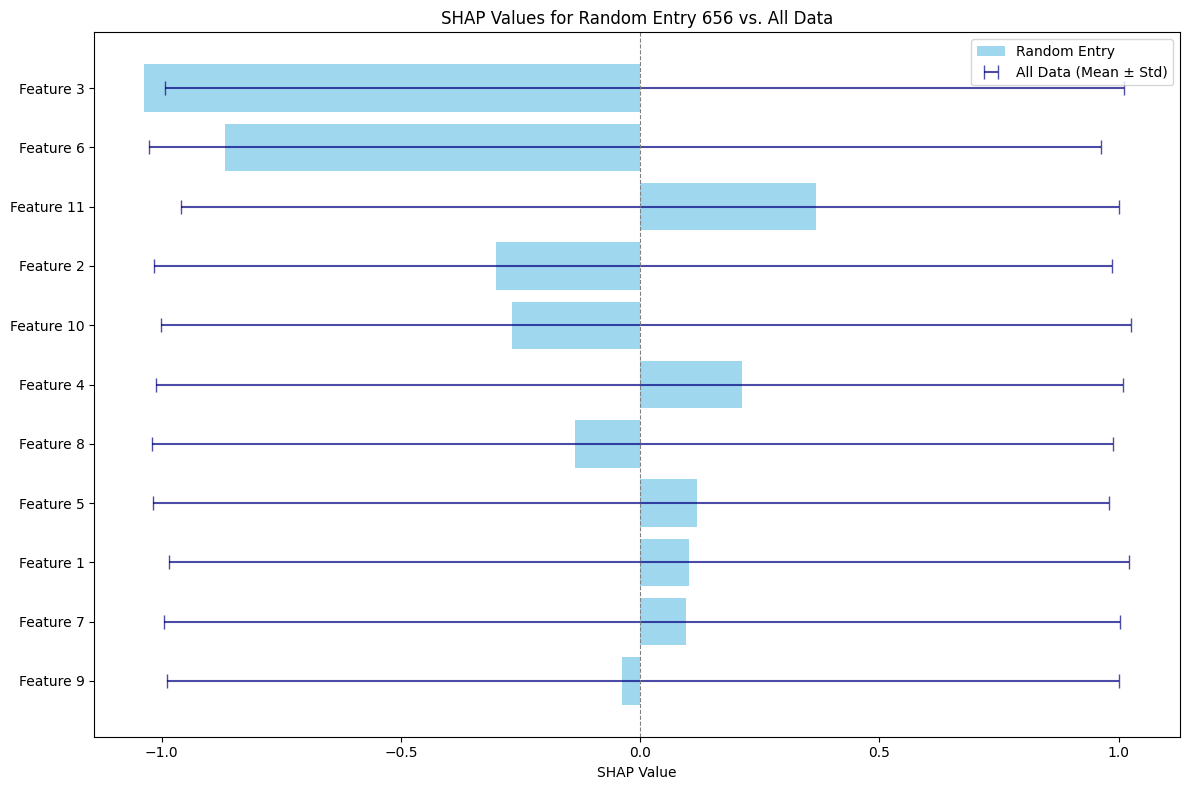

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_shap_contribution(shap_values, feature_names):
    # Assuming shap_values has shape (1000, 11, 3)
    n_samples, n_features, n_classes = shap_values.shape

    # Select a random data entry
    random_entry = np.random.randint(0, n_samples)

    # Calculate mean SHAP values across classes for the random entry
    mean_shap_random = shap_values[random_entry].mean(axis=1)

    # Calculate mean and std of SHAP values across all samples and classes
    mean_shap_all = shap_values.mean(axis=(0, 2))
    std_shap_all = shap_values.std(axis=(0, 2))

    # Sort features by absolute SHAP value of the random entry
    sorted_idx = np.argsort(np.abs(mean_shap_random))
    sorted_features = [feature_names[i] for i in sorted_idx]

    # Create the plot
    plt.figure(figsize=(12, 8))
    y_pos = np.arange(n_features)

    # Plot bars for the random entry
    plt.barh(y_pos, mean_shap_random[sorted_idx], align='center', alpha=0.8, color='skyblue', label='Random Entry')

    # Add error bars for all data
    plt.errorbar(mean_shap_all[sorted_idx], y_pos, xerr=std_shap_all[sorted_idx], fmt='none', color='navy', alpha=0.7, capsize=5, label='All Data (Mean ± Std)')

    plt.yticks(y_pos, sorted_features)
    plt.xlabel('SHAP Value')
    plt.title(f'SHAP Values for Random Entry {random_entry} vs. All Data')
    plt.legend()

    # Add a vertical line at x=0 for reference
    plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.8)

    plt.tight_layout()
    plt.show()

# Example usage
np.random.seed(42)  # for reproducibility
shap_values = np.random.randn(1000, 11, 3)  # random SHAP values for demonstration
feature_names = [f'Feature {i+1}' for i in range(11)]

plot_shap_contribution(shap_values, feature_names)

In [31]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_shap_contribution(shap_values, feature_names):
    # Assuming shap_values has shape (1000, 11, 3)
    n_samples, n_features, n_classes = shap_values.shape

    # Select a random data entry
    random_entry = np.random.randint(0, n_samples)

    # Calculate mean SHAP values across classes for the random entry
    mean_shap_random = shap_values[random_entry].mean(axis=1)

    # Calculate mean and std of SHAP values across all samples and classes
    mean_shap_all = shap_values.mean(axis=(0, 2))
    std_shap_all = shap_values.std(axis=(0, 2))

    # Sort features by absolute SHAP value of the random entry
    sorted_idx = np.argsort(np.abs(mean_shap_random))
    sorted_features = [feature_names[i] for i in sorted_idx]

    # Create the plot
    fig = make_subplots(rows=1, cols=1)

    # Add bars for the random entry
    fig.add_trace(
        go.Bar(
            y=sorted_features,
            x=mean_shap_random[sorted_idx],
            orientation='h',
            name=f'Random Entry {random_entry}',
            marker_color='skyblue'
        )
    )

    # Add error bars for all data
    fig.add_trace(
        go.Scatter(
            y=sorted_features,
            x=mean_shap_all[sorted_idx],
            error_x=dict(
                type='data',
                array=std_shap_all[sorted_idx],
                visible=True
            ),
            mode='markers',
            name='All Data (Mean ± Std)',
            marker=dict(color='navy', size=8)
        )
    )

    # Update layout
    fig.update_layout(
        title=f'SHAP Values for Random Entry {random_entry} vs. All Data',
        xaxis_title='SHAP Value',
        yaxis_title='Features',
        height=600,
        width=1000,
        legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
        shapes=[
            dict(
                type='line',
                yref='paper', y0=0, y1=1,
                xref='x', x0=0, x1=0,
                line=dict(color='grey', width=1, dash='dash')
            )
        ]
    )

    # Reverse the y-axis to match matplotlib's bottom-to-top ordering
    fig.update_layout(yaxis={'autorange': 'reversed'})

    fig.show()

# Example usage
np.random.seed(42)  # for reproducibility
shap_values = np.random.randn(1000, 11, 3)  # random SHAP values for demonstration
feature_names = [f'Feature {i+1}' for i in range(11)]

plot_shap_contribution(shap_values, feature_names)

In [33]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

def create_waterfall_chart(features, values, base_value, final_value):
    # Ensure the values sum up correctly
    assert np.isclose(base_value + sum(values), final_value), "Values don't sum up correctly"

    # Create a DataFrame for easier manipulation
    df = pd.DataFrame({
        'Feature': features + ['Final Prediction'],
        'Value': values + [final_value - (base_value + sum(values))],
        'Text': [f'{v:.2f}%' for v in values] + [f'{final_value:.2f}%']
    })

    # Calculate cumulative sum for measure
    df['Cumulative'] = base_value + df['Value'].cumsum()
    df['Measure'] = ['relative'] * len(features) + ['total']

    # Define colors
    colors = ['#00FF00' if val >= 0 else '#FF0000' for val in df['Value']]
    colors[-1] = '#0000FF'  # Final bar in blue

    # Create the waterfall chart
    fig = go.Figure(go.Waterfall(
        name="Contribution", orientation="v",
        measure=df['Measure'],
        x=df['Feature'],
        textposition="outside",
        text=df['Text'],
        y=df['Value'],
        connector={"line":{"color":"rgb(63, 63, 63)"}},
        decreasing={"marker":{"color":"#FF0000"}},
        increasing={"marker":{"color":"#00FF00"}},
        totals={"marker":{"color":"#0000FF"}},
    ))

    # Update layout
    fig.update_layout(
        title=f"Contribution to prediction probability = {final_value:.2f}%",
        showlegend=False,
        xaxis_title="",
        yaxis_title="Prediction (%)",
        yaxis_range=[0, 100],
        xaxis={'categoryorder':'total ascending'},  # This will order the x-axis
        waterfallgap=0.2,
    )

    # Add a base line at the initial value
    fig.add_shape(type="line",
        x0=-0.5, y0=base_value, x1=len(features)-0.5, y1=base_value,
        line=dict(color="red", width=2, dash="dot")
    )

    return fig

# Example usage
features = ['Average', 'PCHLNDVOLUME', 'CITY_TIER2', 'PCNHUNDLVOLUME', 'CITY_TIER3', 'DOT_TIER2', 'CITY_TIER4', 'PCTIMETODELIVER', 'CITY_TIER5', 'GENDER_FEMALE', 'PCHUNDBILLVOLUME', 'DOT_TIER3', 'PCTRIPSVOLUME', 'GENDER_MALE', 'CITY_TIER1', 'DOT_TIER1', 'DOT_TIER4', 'PCTIMETOOPEN', 'PCBILLVOLUME', 'Final Prediction']
values = [52.05, 2.32, 1.75, 1.51, 0.89, 0.77, 0.67, 0.56, 0.45, 0.34, 0.23, 0.12, 0.01, -0.1, -0.21, -0.32, -0.43, -0.54, -0.65, -22.77]
base_value = 0  # Starting value
final_value = 36.65  # Final prediction value

fig = create_waterfall_chart(features, values, base_value, final_value)
fig.show()

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import shap
import plotly.graph_objects as go

def prepare_data(df, target_column):
    """Prepare the data for modeling."""
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, X.columns

def train_model(X_train, y_train):
    """Train a Random Forest model."""
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

def calculate_shap_values(model, X_train, X_test):
    """Calculate SHAP values."""
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    return shap_values, explainer.expected_value

# def create_waterfall_chart(shap_values, feature_names, base_value, sample_idx=0):
#     """Create a waterfall chart for a single sample."""
#     # For binary classification, we'll use the SHAP values for class 1
#     if isinstance(shap_values, list):
#         sample_shap_values = shap_values[1][sample_idx]
#     else:
#         sample_shap_values = shap_values[sample_idx]
    
#     # Sort features by absolute SHAP value
#     sorted_idx = np.argsort(np.abs(sample_shap_values))[::-1]
#     sorted_features = [feature_names[i] for i in sorted_idx]
#     sorted_values = sample_shap_values[sorted_idx]
    
#     # Calculate final prediction value
#     final_value = base_value + np.sum(sorted_values)
    
#     # Create a DataFrame for the waterfall chart
#     df = pd.DataFrame({
#         'Feature': sorted_features + ['Final Prediction'],
#         'Value': np.concatenate([sorted_values, [final_value - (base_value + np.sum(sorted_values))]]),
#         'Text': [f'{v:.4f}' for v in sorted_values] + [f'{final_value:.4f}']
#     })
    
#     df['Measure'] = ['relative'] * len(sorted_features) + ['total']
    
#     # Create the waterfall chart
#     fig = go.Figure(go.Waterfall(
#         name="Contribution", orientation="v",
#         measure=df['Measure'],
#         x=df['Feature'],
#         textposition="outside",
#         text=df['Text'],
#         y=df['Value'],
#         connector={"line":{"color":"rgb(63, 63, 63)"}},
#         decreasing={"marker":{"color":"#FF0000"}},
#         increasing={"marker":{"color":"#00FF00"}},
#         totals={"marker":{"color":"#0000FF"}},
#     ))
    
#     # Update layout
#     fig.update_layout(
#         title=f"SHAP values for sample {sample_idx} (Final prediction: {final_value:.4f})",
#         showlegend=False,
#         xaxis_title="",
#         yaxis_title="SHAP value",
#         xaxis={'categoryorder':'total ascending'},
#         waterfallgap=0.2,
#     )
    
#     # Add a base line at the initial value
#     fig.add_shape(type="line",
#         x0=-0.5, y0=base_value, x1=len(sorted_features)-0.5, y1=base_value,
#         line=dict(color="red", width=2, dash="dot")
#     )
    
#     return fig
def create_waterfall_chart(shap_values, feature_names, base_value, sample_idx=0, class_idx=1):
    """Create a waterfall chart for a single sample."""
    # Handle multi-dimensional SHAP values
    if isinstance(shap_values, list):
        # Multi-class case
        sample_shap_values = shap_values[class_idx][sample_idx]
        if isinstance(base_value, np.ndarray):
            base_value = base_value[class_idx]
    elif shap_values.ndim == 3:
        # Multi-class case, but SHAP values are in a single array
        sample_shap_values = shap_values[sample_idx, :, class_idx]
    else:
        # Binary classification or regression case
        sample_shap_values = shap_values[sample_idx]
    
    # Sort features by absolute SHAP value
    sorted_idx = np.argsort(np.abs(sample_shap_values))[::-1]
    sorted_features = [feature_names[i] for i in sorted_idx]
    sorted_values = sample_shap_values[sorted_idx]
    
    # Calculate final prediction value
    final_value = base_value + np.sum(sorted_values)
    
    # Create a DataFrame for the waterfall chart
    df = pd.DataFrame({
        'Feature': sorted_features + ['Final Prediction'],
        'Value': np.concatenate([sorted_values, [final_value - (base_value + np.sum(sorted_values))]]),
        'Text': [f'{v:.4f}' for v in sorted_values] + [f'{final_value:.4f}']
    })
    
    df['Measure'] = ['relative'] * len(sorted_features) + ['total']
    
    # Create the waterfall chart
    fig = go.Figure(go.Waterfall(
        name="Contribution", orientation="v",
        measure=df['Measure'],
        x=df['Feature'],
        textposition="outside",
        text=df['Text'],
        y=df['Value'],
        connector={"line":{"color":"rgb(63, 63, 63)"}},
        decreasing={"marker":{"color":"#FF0000"}},
        increasing={"marker":{"color":"#00FF00"}},
        totals={"marker":{"color":"#0000FF"}},
    ))
    
    # Update layout
    fig.update_layout(
        title=f"SHAP values for sample {sample_idx}, class {class_idx} (Final prediction: {final_value:.4f})",
        showlegend=False,
        xaxis_title="",
        yaxis_title="SHAP value",
        xaxis={'categoryorder':'total ascending'},
        waterfallgap=0.2,
    )
    
    # Add a base line at the initial value
    fig.add_shape(type="line",
        x0=-0.5, y0=base_value, x1=len(sorted_features)-0.5, y1=base_value,
        line=dict(color="red", width=2, dash="dot")
    )
    
    return fig

# Main process
def shap_waterfall_analysis(df, target_column):
    # Prepare data
    X_train_scaled, X_test_scaled, y_train, y_test, feature_names = prepare_data(df, target_column)
    
    # Train model
    model = train_model(X_train_scaled, y_train)
    
    # Calculate SHAP values
    shap_values, base_value = calculate_shap_values(model, X_train_scaled, X_test_scaled)
    
    # If base_value is a list (for multi-class), take the value for class 1
    if isinstance(base_value, np.ndarray):
        base_value = base_value[1]
    
    # Create waterfall chart for the first test sample
    fig = create_waterfall_chart(shap_values, feature_names, base_value, sample_idx=0)
    
    return fig

# Example usage
# Assuming you have a DataFrame 'df' with features and a target column 'target'
# df = pd.read_csv('your_data.csv')
# fig = shap_waterfall_analysis(df, 'target')
# fig.show()

# For demonstration, let's create a synthetic dataset
np.random.seed(42)
n_samples = 1000
n_features = 10
X = np.random.randn(n_samples, n_features)
y = (X[:, 0] + X[:, 1] - X[:, 2] > 0).astype(int)
feature_names = [f'Feature_{i}' for i in range(n_features)]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

fig = shap_waterfall_analysis(df, 'target')
fig.show()

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import shap
import plotly.graph_objects as go

def prepare_data(df, target_column):
    """Prepare the data for modeling."""
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
    
    return X_scaled, y, X.columns

def train_model(X, y):
    """Train a Random Forest model."""
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)
    return model

def calculate_shap_values(model, X):
    """Calculate SHAP values."""
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    return shap_values, explainer.expected_value

def create_waterfall_chart(shap_values, feature_names, base_value, instance_index, sort_order='absolute', class_index=1):
    """Create a waterfall chart for a specific instance compared to the dataset mean."""
    print(shap_values.shape, len(feature_names), base_value)
    
    # Handle multi-dimensional SHAP values
    if isinstance(shap_values, list):
        # Multi-class case
        instance_shap = shap_values[class_index][instance_index]
        mean_shap = np.mean(shap_values[class_index], axis=0)
        if isinstance(base_value, np.ndarray):
            base_value = base_value[class_index]
    elif shap_values.ndim == 3:
        # Multi-class case, but SHAP values are in a single array
        instance_shap = shap_values[instance_index, :, class_index]
        mean_shap = np.mean(shap_values[:, :, class_index], axis=0)
    else:
        # Binary classification or regression case
        instance_shap = shap_values[instance_index]
        mean_shap = np.mean(shap_values, axis=0)
    
    # Calculate the difference between instance and mean SHAP values
    diff_shap = instance_shap - mean_shap
    
    # Sort the features based on the specified order
    if sort_order == 'high-to-low':
        sorted_idx = np.argsort(diff_shap)[::-1]
    elif sort_order == 'low-to-high':
        sorted_idx = np.argsort(diff_shap)
    else:  # 'absolute'
        sorted_idx = np.argsort(np.abs(diff_shap))[::-1]

    print(sorted_idx)
    
    sorted_features = [feature_names[i] for i in sorted_idx]
    sorted_values = diff_shap[sorted_idx]
    
    # Calculate final prediction value
    final_value = base_value + np.sum(instance_shap)
    mean_prediction = base_value + np.sum(mean_shap)
    
    # Create a DataFrame for the waterfall chart
    df = pd.DataFrame({
        'Feature': sorted_features + ['Final Prediction'],
        'Value': np.concatenate([sorted_values, [final_value - mean_prediction]]),
        'Text': [f'{v:.4f}' for v in sorted_values] + [f'{final_value - mean_prediction:.4f}']
    })
    
    df['Measure'] = ['relative'] * len(sorted_features) + ['total']
    
    # Create the waterfall chart
    fig = go.Figure(go.Waterfall(
        name="Contribution", orientation="v",
        measure=df['Measure'],
        x=df['Feature'],
        textposition="outside",
        text=df['Text'],
        y=df['Value'],
        connector={"line":{"color":"rgb(63, 63, 63)"}},
        decreasing={"marker":{"color":"#FF0000"}},
        increasing={"marker":{"color":"#00FF00"}},
        totals={"marker":{"color":"#0000FF"}},
    ))
    
    # Update layout
    fig.update_layout(
        title=f"SHAP value differences for instance {instance_index} vs. dataset mean<br>(Final prediction: {final_value:.4f}, Mean prediction: {mean_prediction:.4f})",
        showlegend=False,
        xaxis_title="",
        yaxis_title="SHAP value difference",
        xaxis={'categoryorder':'total ascending'},
        waterfallgap=0.2,
    )
    
    # Add a base line at zero (representing the mean prediction)
    fig.add_shape(type="line",
        x0=-0.5, y0=0, x1=len(sorted_features)-0.5, y1=0,
        line=dict(color="red", width=2, dash="dot")
    )
    
    return fig

def shap_waterfall_analysis(df, target_column, instance_index, sort_order='absolute'):
    # Prepare data
    X_scaled, y, feature_names = prepare_data(df, target_column)
    
    # Train model
    model = train_model(X_scaled, y)
    
    # Calculate SHAP values
    shap_values, base_value = calculate_shap_values(model, X_scaled)
    
    # If base_value is a list (for multi-class), take the value for class 1
    if isinstance(base_value, np.ndarray):
        base_value = base_value[1]
    
    # Create waterfall chart for the specified instance
    fig = create_waterfall_chart(shap_values, feature_names, base_value, instance_index, sort_order)
    
    return fig

# Example usage
# Generate synthetic data
np.random.seed(42)
n_samples = 1000
n_features = 10
X = np.random.randn(n_samples, n_features)
y = (X[:, 0] + X[:, 1] - X[:, 2] > 0).astype(int)
feature_names = [f'Feature_{i}' for i in range(n_features)]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Create and display the waterfall chart for instance 0, sorted by absolute SHAP value differences
fig = shap_waterfall_analysis(df, 'target', instance_index=0, sort_order='high-to-low')
fig.show()

# You can change the instance and sorting order like this:
# fig = shap_waterfall_analysis(df, 'target', instance_index=42, sort_order='high-to-low')
# fig.show()

(1000, 10, 2) 10 0.50387
[0 9 8 6 4 5 7 3 1 2]


In [23]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

def create_waterfall_chart(shap_values, feature_names, base_value, instance_index, sort_order='absolute', class_index=0):
    """Create a waterfall chart for a specific instance compared to the dataset mean."""
    
    # Handle multi-dimensional SHAP values
    instance_shap = shap_values[class_index][instance_index]
    mean_shap = np.mean(shap_values[class_index], axis=0)
    if isinstance(base_value, np.ndarray):
        base_value = base_value[class_index]
    
    # Calculate the difference between instance and mean SHAP values
    diff_shap = instance_shap - mean_shap
    
    # Sort the features based on the specified order
    if sort_order == 'high-to-low':
        sorted_idx = np.argsort(diff_shap)[::-1]
    elif sort_order == 'low-to-high':
        sorted_idx = np.argsort(diff_shap)
    else:  # 'absolute'
        sorted_idx = np.argsort(np.abs(diff_shap))[::-1]
    
    sorted_features = [feature_names[i] for i in sorted_idx]
    sorted_values = diff_shap[sorted_idx]
    
    # Calculate final prediction value
    final_value = base_value + np.sum(instance_shap)
    mean_prediction = base_value + np.sum(mean_shap)
    
    # Create a DataFrame for the waterfall chart
    df = pd.DataFrame({
        'Feature': sorted_features + ['Final Prediction'],
        'Value': np.concatenate([sorted_values, [final_value - mean_prediction]]),
        'Text': [f'{v:.4f}' for v in sorted_values] + [f'{final_value - mean_prediction:.4f}']
    })
    
    df['Measure'] = ['relative'] * len(sorted_features) + ['total']
    
    # Create the waterfall chart
    fig = go.Figure(go.Waterfall(
        name="Contribution", orientation="v",
        measure=df['Measure'],
        x=df['Feature'],
        textposition="outside",
        text=df['Text'],
        y=df['Value'],
        connector={"line":{"color":"rgb(63, 63, 63)"}},
        decreasing={"marker":{"color":"#FF0000"}},
        increasing={"marker":{"color":"#00FF00"}},
        totals={"marker":{"color":"#0000FF"}},
    ))
    
    # Update layout
    fig.update_layout(
        title=f"SHAP value differences for instance {instance_index}, class {class_index} vs. dataset mean<br>(Final prediction: {final_value:.4f}, Mean prediction: {mean_prediction:.4f})",
        showlegend=False,
        xaxis_title="",
        yaxis_title="SHAP value difference",
        xaxis={'categoryorder':'total ascending'},
        waterfallgap=0.2,
    )
    
    # Add a base line at zero (representing the mean prediction)
    fig.add_shape(type="line",
        x0=-0.5, y0=0, x1=len(sorted_features)-0.5, y1=0,
        line=dict(color="red", width=2, dash="dot")
    )
    
    return fig

def prepare_data(df, target_column):
    """Prepare data for modeling."""
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    feature_names = X.columns.tolist()
    
    return X_scaled, y, feature_names

def train_model(X, y):
    """Train a Random Forest model."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    return model

def calculate_shap_values(model, X):
    """Calculate SHAP values for the model."""
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    base_value = explainer.expected_value
    
    return shap_values, base_value

def shap_waterfall_analysis(df, target_column, instance_index, sort_order='absolute', class_index=0):
    # Prepare data
    X_scaled, y, feature_names = prepare_data(df, target_column)
    
    # Train model
    model = train_model(X_scaled, y)
    
    # Calculate SHAP values
    shap_values, base_value = calculate_shap_values(model, X_scaled)
    
    # Create waterfall chart for the specified instance and class
    fig = create_waterfall_chart(shap_values, feature_names, base_value, instance_index, sort_order, class_index)
    
    return fig

# Example usage for 3-class problem
# Generate synthetic data
np.random.seed(42)
n_samples = 1000
n_features = 10
X = np.random.randn(n_samples, n_features)
y = np.array([0, 1, 2])[(X[:, 0] + X[:, 1] - X[:, 2] > 1).astype(int) + (X[:, 0] - X[:, 1] + X[:, 2] > 0.5).astype(int)]
feature_names = [f'Feature_{i}' for i in range(n_features)]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Create and display the waterfall chart for instance 0, class 0, sorted by absolute SHAP value differences
fig0 = shap_waterfall_analysis(df, 'target', instance_index=0, sort_order='absolute', class_index=0)
fig0.show()

# Create and display the waterfall chart for instance 0, class 1, sorted by absolute SHAP value differences
fig1 = shap_waterfall_analysis(df, 'target', instance_index=0, sort_order='absolute', class_index=1)
fig1.show()

# Create and display the waterfall chart for instance 0, class 2, sorted by absolute SHAP value differences
fig2 = shap_waterfall_analysis(df, 'target', instance_index=0, sort_order='absolute', class_index=2)
fig2.show()

In [24]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

def create_waterfall_chart(shap_values, feature_names, base_value, instance_index, sort_order='absolute', class_index=0):
    """Create a waterfall chart for a specific instance compared to the dataset mean."""
    
    # Handle multi-dimensional SHAP values
    instance_shap = shap_values[class_index][instance_index]
    mean_shap = np.mean(shap_values[class_index], axis=0)
    if isinstance(base_value, np.ndarray):
        base_value = base_value[class_index]
    
    # Calculate the difference between instance and mean SHAP values
    diff_shap = instance_shap - mean_shap
    
    # Sort the features based on the specified order
    if sort_order == 'high-to-low':
        sorted_idx = np.argsort(diff_shap)[::-1]
    elif sort_order == 'low-to-high':
        sorted_idx = np.argsort(diff_shap)
    else:  # 'absolute'
        sorted_idx = np.argsort(np.abs(diff_shap))[::-1]
    
    sorted_features = [feature_names[i] for i in sorted_idx]
    sorted_values = diff_shap[sorted_idx]
    
    # Calculate final prediction value
    final_value = base_value + np.sum(instance_shap)
    mean_prediction = base_value + np.sum(mean_shap)
    
    # Create a DataFrame for the waterfall chart
    df = pd.DataFrame({
        'Feature': sorted_features + ['Final Prediction'],
        'Value': np.concatenate([sorted_values, [final_value - mean_prediction]]),
        'Text': [f'{v:.4f}' for v in sorted_values] + [f'{final_value - mean_prediction:.4f}']
    })
    
    df['Measure'] = ['relative'] * len(sorted_features) + ['total']
    
    # Create the waterfall chart
    fig = go.Figure(go.Waterfall(
        name="Contribution", orientation="v",
        measure=df['Measure'],
        x=df['Feature'],
        textposition="outside",
        text=df['Text'],
        y=df['Value'],
        connector={"line":{"color":"rgb(63, 63, 63)"}},
        decreasing={"marker":{"color":"#FF0000"}},
        increasing={"marker":{"color":"#00FF00"}},
        totals={"marker":{"color":"#0000FF"}},
    ))
    
    # Update layout
    fig.update_layout(
        title=f"SHAP value differences for instance {instance_index}, class {class_index} vs. dataset mean<br>(Final prediction: {final_value:.4f}, Mean prediction: {mean_prediction:.4f})",
        showlegend=False,
        xaxis_title="",
        yaxis_title="SHAP value difference",
        xaxis={'categoryorder':'total ascending'},
        waterfallgap=0.2,
    )
    
    # Add a base line at zero (representing the mean prediction)
    fig.add_shape(type="line",
        x0=-0.5, y0=0, x1=len(sorted_features)-0.5, y1=0,
        line=dict(color="red", width=2, dash="dot")
    )
    
    return fig

def prepare_data(df, target_column):
    """Prepare data for modeling."""
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    feature_names = X.columns.tolist()
    
    return X_scaled, y, feature_names

def train_model(X, y):
    """Train a Random Forest model."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    return model

def calculate_shap_values(model, X):
    """Calculate SHAP values for the model."""
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    base_value = explainer.expected_value
    
    return shap_values, base_value

def shap_waterfall_analysis(df, target_column, instance_index, sort_order='absolute'):
    # Prepare data
    X_scaled, y, feature_names = prepare_data(df, target_column)
    
    # Train model
    model = train_model(X_scaled, y)
    
    # Calculate SHAP values
    shap_values, base_value = calculate_shap_values(model, X_scaled)
    
    # Determine the number of classes
    n_classes = len(np.unique(y))
    
    # Create waterfall charts for all classes
    figs = []
    for class_index in range(n_classes):
        fig = create_waterfall_chart(shap_values, feature_names, base_value, instance_index, sort_order, class_index)
        figs.append(fig)
    
    return figs

# Example usage for multi-class problem
# Generate synthetic data
np.random.seed(42)
n_samples = 1000
n_features = 10
n_classes = 4  # You can change this to any number of classes
X = np.random.randn(n_samples, n_features)
y = np.random.randint(0, n_classes, n_samples)
feature_names = [f'Feature_{i}' for i in range(n_features)]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Create and display the waterfall charts for instance 0, sorted by absolute SHAP value differences
figs = shap_waterfall_analysis(df, 'target', instance_index=0, sort_order='absolute')

# Display all figures
for i, fig in enumerate(figs):
    print(f"Displaying chart for class {i}")
    fig.show()

Displaying chart for class 0


Displaying chart for class 1


Displaying chart for class 2


Displaying chart for class 3


In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

def create_waterfall_chart(shap_values, feature_names, base_value, instance_index, sort_order='absolute', class_index=0):
    """Create a waterfall chart for a specific instance compared to the dataset mean."""
    
    # Handle multi-dimensional SHAP values
    instance_shap = shap_values[class_index][instance_index]
    mean_shap = np.mean(shap_values[class_index], axis=0)
    if isinstance(base_value, np.ndarray):
        base_value = base_value[class_index]
    
    # Calculate the difference between instance and mean SHAP values
    diff_shap = instance_shap - mean_shap
    
    # Sort the features based on the specified order
    if sort_order == 'high-to-low':
        sorted_idx = np.argsort(diff_shap)[::-1]
    elif sort_order == 'low-to-high':
        sorted_idx = np.argsort(diff_shap)
    else:  # 'absolute'
        sorted_idx = np.argsort(np.abs(diff_shap))[::-1]
    
    sorted_features = [feature_names[i] for i in sorted_idx]
    sorted_values = diff_shap[sorted_idx]
    
    # Calculate final prediction value
    final_value = base_value + np.sum(instance_shap)
    mean_prediction = base_value + np.sum(mean_shap)
    
    # Create a DataFrame for the waterfall chart
    df = pd.DataFrame({
        'Feature': sorted_features + ['Final Prediction'],
        'Value': np.concatenate([sorted_values, [final_value - mean_prediction]]),
        'Text': [f'{v:.4f}' for v in sorted_values] + [f'{final_value - mean_prediction:.4f}']
    })
    
    df['Measure'] = ['relative'] * len(sorted_features) + ['total']
    
    # Create the waterfall chart
    fig = go.Figure(go.Waterfall(
        name="Contribution", orientation="v",
        measure=df['Measure'],
        x=df['Feature'],
        textposition="outside",
        text=df['Text'],
        y=df['Value'],
        connector={"line":{"color":"rgb(63, 63, 63)"}},
        decreasing={"marker":{"color":"#FF0000"}},
        increasing={"marker":{"color":"#00FF00"}},
        totals={"marker":{"color":"#0000FF"}},
    ))
    
    # Update layout
    fig.update_layout(
        title=f"SHAP value differences for instance {instance_index}, class {class_index} vs. dataset mean<br>(Final prediction: {final_value:.4f}, Mean prediction: {mean_prediction:.4f})",
        showlegend=False,
        xaxis_title="",
        yaxis_title="SHAP value difference",
        xaxis={'categoryorder':'total ascending'},
        waterfallgap=0.2,
    )
    
    # Add a base line at zero (representing the mean prediction)
    fig.add_shape(type="line",
        x0=-0.5, y0=0, x1=len(sorted_features)-0.5, y1=0,
        line=dict(color="red", width=2, dash="dot")
    )
    
    return fig

def prepare_data(df, target_column):
    """Prepare data for modeling."""
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    feature_names = X.columns.tolist()
    
    return X_scaled, y, feature_names

def train_model(X, y):
    """Train a Random Forest model."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    return model

def calculate_shap_values(model, X):
    """Calculate SHAP values for the model."""
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    base_value = explainer.expected_value
    
    return shap_values, base_value

def shap_waterfall_analysis(df, target_column, instance_index, sort_order='absolute'):
    # Prepare data
    X_scaled, y, feature_names = prepare_data(df, target_column)
    
    # Train model
    model = train_model(X_scaled, y)
    
    # Calculate SHAP values
    shap_values, base_value = calculate_shap_values(model, X_scaled)
    
    # Determine the number of classes
    n_classes = len(np.unique(y))
    
    # Create waterfall charts for all classes
    figs = []
    for class_index in range(n_classes):
        fig = create_waterfall_chart(shap_values, feature_names, base_value, instance_index, sort_order, class_index)
        figs.append(fig)
    
    return figs

# Example usage for multi-class problem
# Generate synthetic data
np.random.seed(42)
n_samples = 1000
n_features = 100
n_classes = 4  # You can change this to any number of classes
X = np.random.randn(n_samples, n_features)
y = np.random.randint(0, n_classes, n_samples)
feature_names = [f'Feature_{i}' for i in range(n_features)]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Create and display the waterfall charts for instance 0, sorted by absolute SHAP value differences
figs = shap_waterfall_analysis(df, 'target', instance_index=0, sort_order='absolute')

# Display all figures
for i, fig in enumerate(figs):
    print(f"Displaying chart for class {i}")
    fig.show()

Displaying chart for class 0


Displaying chart for class 1


Displaying chart for class 2


Displaying chart for class 3


In [16]:
def agg_dataframes(df, class_nums):
    dfs_by_class = {}
    for class_num in range(class_nums):
        cols_for_class = [col for col in df.columns if f'_class_{class_num}' in col]
        dfs_by_class[f'class_{class_num}'] = df[cols_for_class]

    return dfs_by_class
    # print(dfs_by_class['class_0'])
    # # print(dfs_by_class.values())
    # if not df:
    #     return None
    # dfs= [_df for _df in dfs_by_class.values()]          
    # return pd.DataFrame(sum(df.values for df in dfs), columns=dfs_by_class['class_0'].columns)

In [21]:
df.columns

Index(['color_class_1', 'color_class_2', 'color_class_3', 'size_class_1',
       'size_class_2', 'size_class_3', 'shape_class_1', 'shape_class_2',
       'shape_class_3', 'weight_class_1', 'weight_class_2', 'weight_class_3',
       'price_class_1', 'price_class_2', 'price_class_3'],
      dtype='object')

In [22]:
[col for col in df.columns if f'_class_{0}' in col]

[]

In [18]:
a= agg_dataframes(df, 3)

In [20]:
a['class_0']

""
0
1
2
3
4
...
95
96
97
98


In [23]:
# Group columns based on their class number (e.g., _class_1, _class_2, etc.)
dfs_by_class = {}

# Loop through the columns and group them by class number
for class_num in range(1, 4):  # Since we know there are 3 classes (1, 2, 3)
    cols_for_class = [col for col in df.columns if f'_class_{class_num}' in col]
    dfs_by_class[f'class_{class_num}'] = df[cols_for_class]

# Now you have three DataFrames: df_class_1, df_class_2, df_class_3
df_class_1 = dfs_by_class['class_1']
df_class_2 = dfs_by_class['class_2']
df_class_3 = dfs_by_class['class_3']


In [24]:
dfs_by_class

{'class_1':     color_class_1  size_class_1  shape_class_1  weight_class_1  price_class_1
 0        4.033873      2.618670       1.542873        1.678306       0.527960
 1       -3.663298      1.586439      -1.656822       -1.581654       0.237485
 2       -2.894837      0.814613      -0.147586       -0.471878       1.525830
 3        1.845690      3.170969       1.172208       -0.694146       1.911530
 4        1.049892     -1.040758       2.441099       -0.263242       0.227602
 ..            ...           ...            ...             ...            ...
 95       2.177270     -1.198048      -1.068976       -0.257989       0.933740
 96       1.961211      3.789897      -0.557649        0.612629       0.133487
 97       4.179118      1.758950       1.791741       -0.679305       0.450739
 98      -2.080411      0.969805       0.302011       -0.888463      -2.298367
 99      -1.088320      1.197547       0.042774        1.671583      -0.345916
 
 [100 rows x 5 columns],
 'class_2':   

In [25]:
df_class_2

,color_class_2,size_class_2,shape_class_2,weight_class_2,price_class_2
0,-1.513656,-1.782522,1.390955,-1.874469,-0.367763
1,-1.255649,-0.108149,-2.437168,0.079009,-0.317369
2,-2.813943,-1.572320,2.539351,-0.556181,0.366909
3,-4.552979,2.814831,0.077293,0.109860,0.319538
4,0.510961,0.059758,1.771116,0.534809,-0.194670
...,...,...,...,...,...
95,-0.571240,-0.210990,-1.064145,-0.378228,-0.703493
96,-2.151849,0.416779,-1.105492,0.794438,1.268621
97,0.644635,2.006872,3.987873,-0.824271,0.350011
98,0.547127,1.922367,-0.661442,0.615779,0.333012


In [47]:
df_class_1

,color_class_1,size_class_1,shape_class_1,weight_class_1,price_class_1
0,4.033873,2.618670,1.542873,1.678306,0.527960
1,-3.663298,1.586439,-1.656822,-1.581654,0.237485
2,-2.894837,0.814613,-0.147586,-0.471878,1.525830
3,1.845690,3.170969,1.172208,-0.694146,1.911530
4,1.049892,-1.040758,2.441099,-0.263242,0.227602
...,...,...,...,...,...
95,2.177270,-1.198048,-1.068976,-0.257989,0.933740
96,1.961211,3.789897,-0.557649,0.612629,0.133487
97,4.179118,1.758950,1.791741,-0.679305,0.450739
98,-2.080411,0.969805,0.302011,-0.888463,-2.298367


In [49]:
result = pd.DataFrame(df_class_1.values + df_class_2.values, columns=df_class_1.columns)

result

,color_class_1,size_class_1,shape_class_1,weight_class_1,price_class_1
0,2.520216,0.836148,2.933827,-0.196163,0.160198
1,-4.918947,1.478290,-4.093990,-1.502645,-0.079884
2,-5.708780,-0.757707,2.391765,-1.028059,1.892739
3,-2.707289,5.985799,1.249501,-0.584286,2.231067
4,1.560852,-0.981000,4.212215,0.271568,0.032932
...,...,...,...,...,...
95,1.606030,-1.409037,-2.133122,-0.636217,0.230247
96,-0.190638,4.206676,-1.663142,1.407067,1.402108
97,4.823754,3.765822,5.779614,-1.503576,0.800750
98,-1.533284,2.892171,-0.359431,-0.272684,-1.965355


In [44]:
# Aggregate SHAP values
original_feature_names = ['color', 'size', 'shape', 'weight', 'price']
aggregated_shap_df = aggregate_shap_values(shap_values, feature_names, original_feature_names)

In [45]:
aggregated_shap_df

,color_cls1,color_cls2,color_cls3,size_cls1,size_cls2,size_cls3,shape_cls1,shape_cls2,shape_cls3,weight_cls1,weight_cls2,weight_cls3,price_cls1,price_cls2,price_cls3
0,-1.294488,1.542873,1.390955,0.162348,-1.157956,0.587831,0.250633,-3.849510,-2.081840,-0.200205,2.024721,-0.853260,-0.014281,0.201907,-0.804737
1,1.429134,-2.481742,-3.385210,-0.848101,1.339128,-0.661191,0.811412,-2.123631,-2.319050,-1.491974,1.590158,0.471642,0.647558,0.536027,0.840171
2,-2.097412,1.649520,1.427888,0.549939,-1.031317,1.249614,-0.108540,4.863643,0.180973,-1.325610,-0.771205,-0.494893,-0.049480,-0.645322,-1.600611
3,-1.221432,3.170969,2.814831,0.725012,1.172208,0.077293,5.286884,0.425098,0.926245,-0.649247,-0.848521,-0.936245,0.333173,-0.257902,-3.478169
4,2.526135,-0.776948,1.167444,-0.564937,1.362574,2.649884,1.931610,-1.109600,-1.874324,-1.523161,1.205915,0.375588,-1.371589,0.485094,-2.062526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.592843,1.117330,-0.399384,0.949171,1.575153,1.700479,-1.311839,-0.941297,1.947912,0.058587,0.052319,0.490829,-1.285682,-0.037312,0.138132
96,1.398513,-1.040853,-1.400037,1.398136,-1.936156,0.619522,0.692155,-1.987263,0.309492,1.036191,1.535468,-0.667308,0.103773,1.281992,0.633095
97,-1.599664,0.843639,-1.886152,-2.496839,0.019120,-1.220264,-1.887279,1.632157,-0.746196,-1.062777,0.589349,-0.261363,0.163210,-0.369353,-0.555342
98,-1.228298,2.489241,2.162089,2.707206,-2.780611,0.222707,-2.147944,-1.079942,0.887350,-0.505049,1.273674,2.011826,-1.369137,-0.688832,0.142748


In [47]:

print("\nOriginal data shape:", data.shape)
print("Original SHAP values shape:", shap_values.shape)
print("Aggregated SHAP values shape:", aggregated_shap_df.shape)

print("\nFeature names after encoding:")
print(feature_names)

print("\nFirst few rows of aggregated SHAP values:")
print(aggregated_shap_df.head())

# Show statistics for numerical features
print("\nStatistics for 'weight':")
print(data['weight'].describe())

print("\nStatistics for 'price':")
print(data['price'].describe())

# Demonstrate sparsity
print("\nSparsity of encoded data:")
print(f"Number of stored elements: {encoded_data.getnnz()} out of {encoded_data.shape[0] * encoded_data.shape[1]}")


Original data shape: (100, 5)
Original SHAP values shape: (100, 11, 3)
Aggregated SHAP values shape: (100, 15)

Feature names after encoding:
['weight' 'price' 'color_blue' 'color_green' 'color_red' 'size_large'
 'size_medium' 'size_small' 'shape_circle' 'shape_square' 'shape_triangle']

First few rows of aggregated SHAP values:
   color_cls1  color_cls2  color_cls3  size_cls1  size_cls2  size_cls3  \
0   -1.294488    1.542873    1.390955   0.162348  -1.157956   0.587831   
1    1.429134   -2.481742   -3.385210  -0.848101   1.339128  -0.661191   
2   -2.097412    1.649520    1.427888   0.549939  -1.031317   1.249614   
3   -1.221432    3.170969    2.814831   0.725012   1.172208   0.077293   
4    2.526135   -0.776948    1.167444  -0.564937   1.362574   2.649884   

   shape_cls1  shape_cls2  shape_cls3  weight_cls1  weight_cls2  weight_cls3  \
0    0.250633   -3.849510   -2.081840    -0.200205     2.024721    -0.853260   
1    0.811412   -2.123631   -2.319050    -1.491974     1.590158

In [29]:
len(p)

1

In [30]:
p[0].shape

(10150, 5889, 3)

In [31]:
p[0].shape

(10150, 5889, 3)

In [32]:
import plotly.express as px

In [33]:
p[0][0].shape

(5889, 3)

In [34]:
len(transformed_df.columns)

5889

In [35]:
p[0].shape

(10150, 5889, 3)

In [36]:
X_test.shape

(10150, 11)

In [37]:
p[0].shape

(10150, 5889, 3)

In [38]:
d= {}
for class_idx in range(p[0].shape[2]):
    print(class_idx)
    shap_values_for_class = p[0][:, :, class_idx]
    mean_abs_shap_values = np.mean(np.abs(shap_values_for_class), axis=0)
    d[f'class {class_idx}']= mean_abs_shap_values

0
1
2


In [70]:
d

{'class 0': array([0.        , 0.        , 0.        , ..., 0.00309222, 0.04446504,
        0.        ], dtype=float32),
 'class 1': array([0.        , 0.        , 0.        , ..., 0.00440809, 0.00592214,
        0.        ], dtype=float32),
 'class 2': array([0.        , 0.        , 0.        , ..., 0.01415735, 0.04229891,
        0.        ], dtype=float32)}

In [39]:
dd= pd.DataFrame(d)

In [60]:
dd['agg']= dd.sum(axis= 1)

In [62]:
dd.index = dd.index.astype(str)

In [69]:
dd

,class 0,class 1,class 2,agg
0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
5884,0.000000,0.000000,0.000000,0.000000
5885,0.002850,0.000032,0.000496,0.003378
5886,0.003092,0.004408,0.014157,0.021658
5887,0.044465,0.005922,0.042299,0.092686


In [68]:
dd.shape[1]

4

In [52]:
dd['class 0'].sort_values(ascending= False)

5349    0.046562
5887    0.044465
5236    0.037963
5338    0.036015
1518    0.028789
          ...   
0       0.000000
5857    0.000000
247     0.000000
5870    0.000000
5861    0.000000
Name: class 0, Length: 5889, dtype: float32

In [44]:
plt_data= dd['class 0'].sort_values(ascending= False)[:10]

In [46]:
plt_data

5349    0.046562
5887    0.044465
5236    0.037963
5338    0.036015
1518    0.028789
5342    0.020229
5271    0.010282
5350    0.008548
1823    0.007966
5608    0.007331
Name: class 0, dtype: float32

In [57]:
import pandas as pd
import plotly.express as px

# Your pandas Series
data = plt_data

# Convert the index to string to treat it as categorical
data.index = data.index.astype(str)

# Create the horizontal bar plot directly from the Series
fig = px.bar(data, x=data.values, y=data.index, orientation='h', title="Horizontal Bar Plot (Descending)")

# Set x-axis range and adjust y-axis to place the largest bar on top
fig.update_layout(
    xaxis_range=[0, data.max() * 1.1],  # Add padding to the max value
    height=600,  # Increase plot height to make bars more visible
    xaxis_title="Values",
    yaxis_title="Names",
    yaxis={'categoryorder':'total ascending'},  # Ensure the largest bar is at the top
    showlegend=False
)

# Show the plot
fig.show()


In [50]:
import pandas as pd
import plotly.express as px

# Your data
data = {
    'Names': [5349, 5887, 5236, 5338, 1518, 5342, 5271, 5350, 1823, 5608],
    'Values': [0.046562, 0.044465, 0.037963, 0.036015, 0.028789, 0.020229, 0.010282, 0.008548, 0.007966, 0.007331]
}

# Create DataFrame and convert Names to string
df = pd.DataFrame(data)
df['Names'] = df['Names'].astype(str)  # Convert Names to string to treat them as categorical

# Create a horizontal bar plot
fig = px.bar(df, y='Names', x='Values', orientation='h', title="Horizontal Bar Plot of Values")

# Set x-axis range and adjust plot height for better visibility
fig.update_layout(
    xaxis_range=[0, max(df['Values']) * 1.1],  # Add padding to the max value
    height=600,  # Increase plot height to make bars more visible
    xaxis_title="Values",
    yaxis_title="Names",
    showlegend=False
)

# Show the plot
fig.show()


In [48]:
import pandas as pd
import plotly.express as px

# Your data
data = {
    'Names': [5349, 5887, 5236, 5338, 1518, 5342, 5271, 5350, 1823, 5608],
    'Values': [0.046562, 0.044465, 0.037963, 0.036015, 0.028789, 0.020229, 0.010282, 0.008548, 0.007966, 0.007331]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a horizontal bar plot
fig = px.bar(df, y='Names', x='Values', orientation='h', title="Horizontal Bar Plot of Values")

# Customize the layout (optional)
fig.update_layout(
    xaxis_title="Values",
    yaxis_title="Names",
    showlegend=False
)

# Show the plot
fig.show()


In [45]:

fig = px.bar(plt_data, title='Feature Importance (Aggregated SHAP Values)')
fig.show()

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

# Sample SHAP values, replace this with your actual SHAP values
shap_values = np.random.rand(100, 10, 3)  # 100 samples, 10 features, 3 classes

# Compute mean absolute SHAP values per class
num_classes = shap_values.shape[2]
tmp = {
    f'class {class_idx}': np.mean(np.abs(shap_values[:, :, class_idx]), axis=0)
    for class_idx in range(num_classes)
}

# Create a DataFrame
data = pd.DataFrame(tmp)

# Plotly bar plot
fig = px.bar(data, title="Mean Absolute SHAP Values by Feature and Class")

# Customize the layout (optional)
fig.update_layout(
    xaxis_title="Feature",
    yaxis_title="Mean Absolute SHAP Value",
    barmode='group'
)

# Show the plot
fig.show()


In [134]:
importance_df.feature.sort_values().values.sum()

np.float32(1.0006435)

In [94]:
len(feature_importance), len(transformed_df.columns)

(5893, 5893)

In [103]:
feature_importance.shape

(5893, 3)

In [129]:
shap_abs_values = [np.abs(sv) for sv in p]
shap_sum = np.sum(np.stack(shap_abs_values), axis=0)
feature_importance = np.sum(shap_sum, axis=0)

importance_df = pd.DataFrame(
    data= feature_importance,
    index= transformed_df.columns,
    columns= ['feature']
)
# importance_df = importance_df.sort_values(by='Importance', ascending=False)
# fig = px.bar(importance_df, x='Feature', y='Importance', title='Feature Importance (Aggregated SHAP Values)')
# fig.show()

ValueError: Shape of passed values is (5893, 3), indices imply (5893, 1)

In [46]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample data
data = pd.DataFrame({
    'numeric_feature': [1, 2, 3, 4],
    'categorical_feature': ['cat', 'dog', 'cat', 'mouse'],
    'corpus': [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',]
})


# Define the transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

text_transformer= ""

# Combine the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['numeric_feature']),
        ('cat', categorical_transformer, ['categorical_feature'])
    ]
)

preprocessor.fit(data)
transformed_data = preprocessor.transform(data)

ohe_columns = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(['categorical_feature'])
numeric_columns = ['numeric_feature']
all_columns = numeric_columns + list(ohe_columns)

transformed_df = pd.DataFrame(transformed_data, columns=all_columns)

transformed_df

,numeric_feature,categorical_feature_cat,categorical_feature_dog,categorical_feature_mouse
0,-1.341641,1.0,0.0,0.0
1,-0.447214,0.0,1.0,0.0
2,0.447214,1.0,0.0,0.0
3,1.341641,0.0,0.0,1.0


In [47]:
import pandas as pd, numpy as np

In [48]:
before= pd.read_csv("alw_grouped.csv")
after= pd.read_csv("merged_df2.csv")

In [4]:
import pickle

try:
    with open('model.pkl', 'rb') as f:
        _model= pickle.load(f)
except FileNotFoundError:
    print("Model file not found.")
except pickle.UnpicklingError:
    print("Error loading the pickle model.")

In [7]:
model = _model.named_steps['model']
processor= _model.named_steps['preprocessor']

In [21]:
import utils, shap

In [16]:
def process_data(_df, all= False):
    DF= utils.missing(_df, "Impute Missing Data")
    DF= utils.remove_outliers(DF, "Use Isolation Forest")
    if all:
        return DF

    X_train, X_test, y_train, y_test= utils.handle(DF, 'res_mapping_binary', 'classification')
    return X_train, X_test, y_train, y_test

In [17]:
X_train, X_test, y_train, y_test= process_data(before)

In [19]:
tra= processor.transform(X_test)

In [24]:
tra_tra= processor.transform(X_train)

In [28]:
X_test.shape

(11453, 16)

In [29]:
X_train.shape

(34356, 16)

In [25]:
assert len(X_train) == len(X_test)

AssertionError: 

In [20]:
cats= processor.named_transformers_['categorical'].get_feature_names_out().tolist()
nums= processor.named_transformers_['numerical'].get_feature_names_out().tolist()
all= cats + nums

In [93]:
explainer = shap.TreeExplainer(model.best_estimator_, feature_names= all)

In [94]:
explanation = explainer(tra)

In [42]:
shap_values = explainer.shap_values(tra)

In [55]:
shap_values.shape

(11453, 7031, 3)

In [57]:
tra.shape

(11453, 7031)

In [49]:
X_test.shape

(11453, 16)

In [64]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')

In [62]:
shap_values_mean = np.mean(shap_values, axis=2)

In [74]:
plt.figure(figsize=(15, 10))
shap.summary_plot(shap_values[:,:,2], tra, feature_names= all)
plt.tight_layout()  # This is optional, as SHAP applies it automatically
plt.show() 

d:\xPlain\streamlit_app\env\lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()
d:\xPlain\streamlit_app\env\lib\site-packages\shap\plots\_beeswarm.py:952: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  pl.show()
C:\Users\amr-ahmed\AppData\Local\Temp\ipykernel_14460\61471368.py:3: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # This is optional, as SHAP applies it automatically
C:\Users\amr-ahmed\AppData\Local\Temp\ipykernel_14460\61471368.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [81]:
matplotlib.use('Agg')

# Create the SHAP plot
plt.figure(figsize=(30, 15))
shap.summary_plot(shap_values[:,:,0], tra)
plt.tight_layout()

# Save to a file
plt.savefig('shap_summary_plot.png')

d:\xPlain\streamlit_app\env\lib\site-packages\shap\plots\_beeswarm.py:952: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  pl.show()


In [91]:
shap.bar_plot(shap_values[:,:,], tra)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [34]:
dense_tra= tra.toarray()

In [35]:
dense_tra.dtype

dtype('float64')

In [36]:
unique_values = np.unique(dense_tra)

print("Unique values:", unique_values)

Unique values: [0.00000000e+00 1.54659340e-13 1.72854557e-13 ... 8.09869222e+01
 3.64057260e+02 9.08969332e+02]


In [80]:
# unique values are within a small range (indicating categorical data)
if len(unique_values) < 10:
    print("Matrix may contain categorical data.")
else:
    print("Matrix likely contains continuous data.")

Matrix likely contains continuous data.


In [41]:
if dense_tra.dtype == object:
    # Check if elements are strings
    contains_strings = all(isinstance(item, str) for row in dense_tra for item in row if item != 0)
    if contains_strings:
        print("Matrix contains categorical data in the form of strings.")
    else:
        print("Matrix does not contain strings as categorical data.")

In [2]:
import sys
if 'ipykernel' in sys.modules:
    print('yes')

yes


In [ ]:
# def get_shap_values_df(self, pos_label=None):
#     """SHAP values calculated using the shap library"""
#     if not hasattr(self, "_shap_values_df"):
#         print("Calculating shap values...", flush=True)
#         if self.shap == "skorch":
#             import torch

#             self._shap_values_df = pd.DataFrame(
#                 self.shap_explainer.shap_values(
#                     torch.tensor(self.X.values), **self.shap_kwargs
#                 ),
#                 columns=self.columns,
#             )
#         else:
#             self._shap_values_df = pd.DataFrame(
#                 self.shap_explainer.shap_values(self.X, **self.shap_kwargs),
#                 columns=self.columns,
#             )
#         self._shap_values_df = merge_categorical_shap_values(
#             self._shap_values_df, self.onehot_dict, self.merged_cols
#         ).astype(self.precision)
#     return self._shap_values_df

In [1]:
import pandas as pd, numpy as np

In [7]:
df= pd.read_excel("data.xlsx")

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No. of Appointments,1309.0,148.192513,183.150866,1.00000,19.000000,74.000000,220.000000,1867.00
New No-Show %,1272.0,0.756097,0.151626,0.12500,0.659672,0.756945,0.868507,1.00
No. of Actual Slots,1317.0,108.297646,136.897742,1.00000,15.000000,55.000000,158.000000,1432.00
No. Of Doctors - Working Clinics,5665.0,1.005649,0.074952,1.00000,1.000000,1.000000,1.000000,2.00
Doctor delay,1632.0,2.697959,25.364151,-52.60274,0.000000,0.000000,0.000000,142.50
Actual Working Hours,4896.0,1151.163399,1921.561546,1.00000,44.000000,220.000000,1167.000000,8819.00
No. Of Cases,1115.0,35.868161,41.931996,1.00000,5.000000,19.000000,54.000000,208.00
Planned Working Hours,4896.0,1155.797386,1933.891190,1.00000,44.000000,232.000000,1168.000000,8957.00
No. of Actual Daily Clinic,5569.0,159.722931,254.666631,1.00000,9.000000,41.000000,190.000000,1123.00
No. Of Planned Slots,5665.0,7797.137688,72124.273390,1.00000,50.000000,336.000000,2327.000000,962767.00


In [38]:
df.describe(include= 'object').T

,count,unique,top,freq
Month Name,5668,32,January 2022,178
Unified Specialty Name,5668,32,Dermatology,960
Doctor Name,5668,180,Asma Mohamed Saleh Almizini,32


In [33]:
pd.DataFrame(df.dtypes, columns= ['type'])

,type
Month Name,object
Unified Specialty Name,object
Doctor Name,object
No. of Appointments,float64
New No-Show %,float64
No. of Actual Slots,float64
No. Of Doctors - Working Clinics,float64
Doctor delay,float64
Actual Working Hours,float64
No. Of Cases,float64


In [37]:
pd.DataFrame((df.isna().sum() / len(df)) * 100, columns=['missing %']).round(2)

,missing %
Month Name,0.00
Unified Specialty Name,0.00
Doctor Name,0.00
No. of Appointments,76.91
New No-Show %,77.56
No. of Actual Slots,76.76
No. Of Doctors - Working Clinics,0.05
Doctor delay,71.21
Actual Working Hours,13.62
No. Of Cases,80.33


In [36]:
len(df[df.duplicated()])

0

In [40]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.05, random_state=0)
numeric_cols = df.select_dtypes(include=np.number).columns
binary_cols = [col for col in numeric_cols if df[col].nunique() == 2]
numeric_cols = [col for col in numeric_cols if col not in binary_cols]

num_df= df[numeric_cols]
num_df['Outlier_Scores'] = model.fit_predict(num_df.iloc[:, 1:].to_numpy())

num_df['Is_Outlier'] = [1 if x == -1 else 0 for x in num_df['Outlier_Scores']]

outlier_percentage = num_df['Is_Outlier'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh')

for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

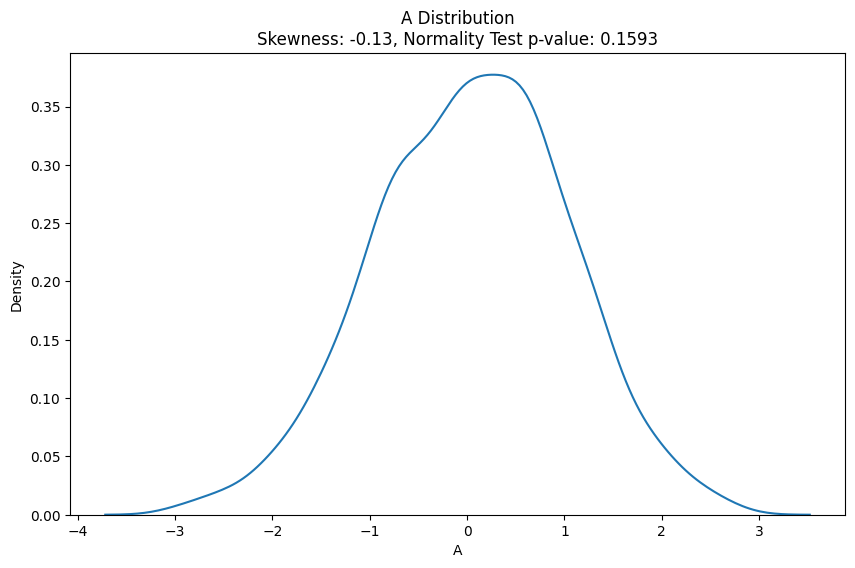

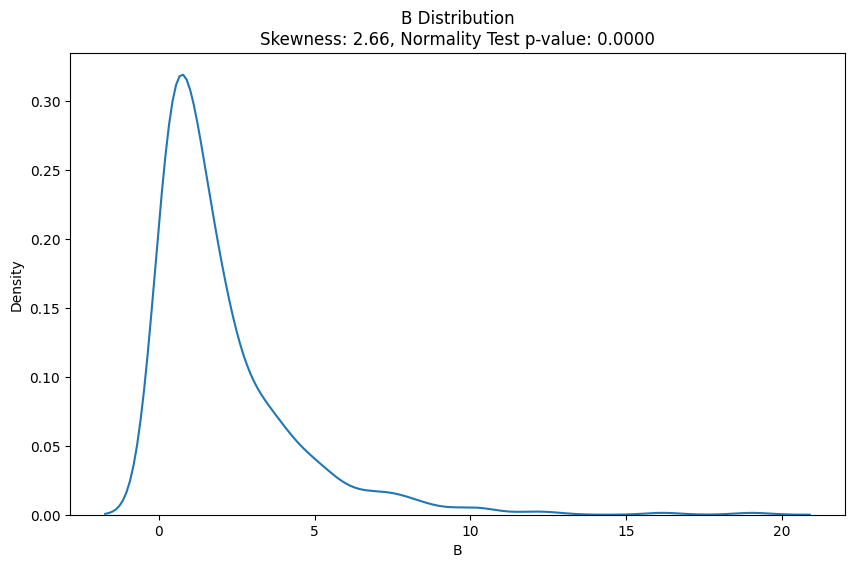

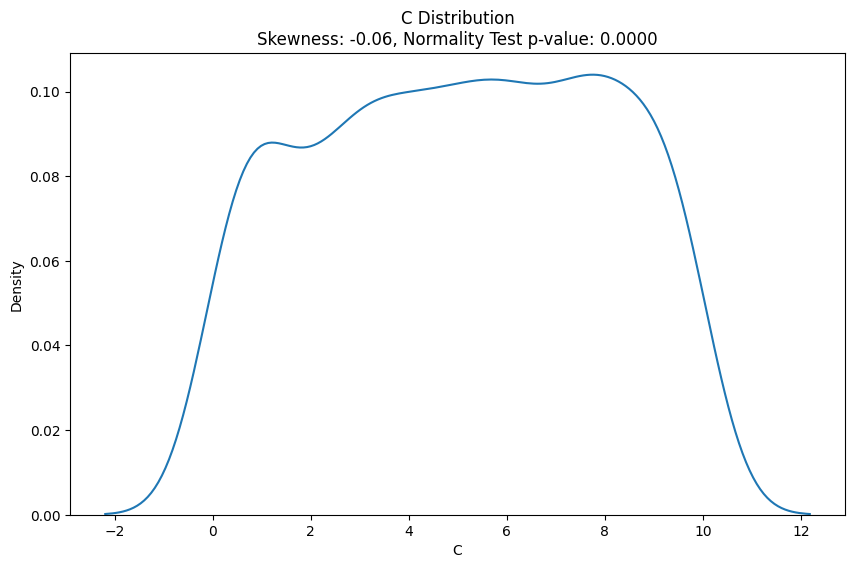

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def plot_numeric_features(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    plots = []
    
    for col in numeric_cols:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.kdeplot(data=df[col], ax=ax)
        
        skewness = stats.skew(df[col].dropna())
        
        _, p_value = stats.normaltest(df[col].dropna())
        
        ax.set_title(f'{col} Distribution\nSkewness: {skewness:.2f}, Normality Test p-value: {p_value:.4f}')
        ax.set_xlabel(col)
        ax.set_ylabel('Density')
        
        plots.append(fig)
        
    return plots

# Example usage:
df = pd.DataFrame({
    'A': np.random.normal(0, 1, 1000),
    'B': np.random.exponential(2, 1000),
    'C': np.random.uniform(0, 10, 1000)
})
plots = plot_numeric_features(df)

# Display plots
for plot in plots:
    plt.show()